In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
print("Pandas Version : {}".format(pd.__version__))
print("Numpy  Version : {}".format(np.__version__))
print("Seaborn Version : {}".format(sns.__version__))
print("Matplotlib Version : {}".format(matplotlib.__version__))

Pandas Version : 1.0.5
Numpy  Version : 1.22.3
Seaborn Version : 0.10.1
Matplotlib Version : 3.2.2


# Load and Inspect Data

In [3]:
loan_df = pd.read_csv("loan.csv",header=0,sep=',', low_memory=False)
loan_df.head()
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,1.860000e+01,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.000000,0.000000e+00,1.100000e+01
inq_last_6mths,39717.0,0.869200,1.070219,0.00,0.00,1.000000,1.000000e+00,8.000000e+00


In [4]:
loan_df.info(max_cols=None, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

In [72]:
# let us load data_dictionary so we can inspect metadata 
data_dict = pd.read_excel('Data_Dictionary.xlsx')


data_dict.dropna(inplace=True)
data_dict.set_index('LoanStatNew',drop=True,inplace=True)


data_dict




,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower i...
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan...
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by th...
annual_inc_joint,The combined self-reported annual income provi...
application_type,Indicates whether the loan is an individual ap...
avg_cur_bal,Average current balance of all accounts
bc_open_to_buy,Total open to buy on revolving bankcards.


In [74]:
# Now we can check the column description like data_dcit.loc['columnname']
data_dict.loc['emp_title'][0]


'The job title supplied by the Borrower when applying for the loan.*'

# Clean up Step-1 :

Find any column with only 1 or less unique values, such columns are good to drop.
Such columns don't add any value in our analysis. 
Also 'url' doesn't add any value, it is associated with 'id'.
Similarly, emp_title, title are of little use due to spread of the data , those can be dropped.
create new dataframe after dropping columns.


In [6]:
cols_valcounts = {}
col_valcounts = { cols:loan_df[cols].unique() for cols in loan_df.columns }

# drop columns with only 1 or less type of value in addition to few more not adding value to analysis.
cols_to_drop = [ col for col,val in col_valcounts.items() if len(val) <=1 ]
cols_to_drop.extend(['url', 'emp_title', 'desc', 'title' ])
print(len(cols_to_drop))
loan_df_new = loan_df.drop(labels=cols_to_drop,axis=1)
print(loan_df_new.shape)

64
(39717, 47)


# Clean up step-2 : 

Five of the columns where values are mmm-yy , they are apt to be converted into datetime type rather than object.
Also ensure dates are Y2K compliant.

In [7]:
cols_to_datetime = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'  ]
loan_df_new[cols_to_datetime] = loan_df_new[cols_to_datetime].apply(lambda x: pd.to_datetime(x,format='%b-%y'))

# Data is not Y2K copliant. It has yy format, so it is not clear if years are from 19th or 20th century.
# define latest possible date the data can be from, let us say today's day and offset if anything is greater than today


cutoff_date = pd.to_datetime('01-10-2022')

for cols in cols_to_datetime:
    loan_df_new.loc[loan_df_new[cols] > cutoff_date, cols] -= pd.DateOffset(years=100)
    
# Let us add year columns as derived columns
loan_df_new['earliest_cr_line_year'] = loan_df_new['earliest_cr_line'].dt.year
loan_df_new['issue_d_year'] = loan_df_new['issue_d'].dt.year

    

# Clean up step-3 :

There are few columns with N/A values , not adding value to coorelation analysis. To be dropped.


In [8]:
na_col_list = loan_df_new.columns[loan_df_new.isna().any()].tolist()

cols_check_na = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens', ]
count_na = [ loan_df_new[col].isna().value_counts()[True] for col in cols_check_na ]

# Let us Drop these NA Values to get right correlation matrix down the line
loan_df_new.dropna(subset=cols_check_na,inplace=True)
# Just assign the value OTHER as we expect only RENT/MORTGAGE/OWN/OTHER 
loan_df_new.loc[loan_df_new['home_ownership'] == 'NONE' , 'home_ownership'] = 'OTHER'

# Clean up step-4 :

'term' column is of type object , which can be converted into int by removing string "months"
Further it has only two values 36 and 60 , you can either convert it as binary 0/1 i.e. 0 for 36 months and 1 for 60
Also , loan_status is target variable, let us convert it as numerical values for analyis and call it as loan_status_number.

In [9]:
loan_df_new['term'] = loan_df_new['term'].str.replace('months','').astype(int).apply(lambda x: 0 if x == 36 else 1)

loan_status_mapping = { key:idx for idx,key in enumerate(list(loan_df_new['loan_status'].unique())) }
loan_df_new['loan_status_number'] = loan_df_new['loan_status'].map(loan_status_mapping) 


# Clean up step-5 :

'int_rate' and 'revol_util' columns are of type object , which can be converted into float by removing string %

In [10]:
loan_df_new.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens',
       'earliest_cr_line_year', 'issue_d_year', 'loan_status_number'],
      dtype='object')

In [11]:
# current_col_name : renamed_col_name i.e. let us change columnname as well , suffix _pct for clarity
cols_replace_pct = {'int_rate':'int_rate_pct','revol_util':'revol_util_pct'}
cols = list(cols_replace_pct.keys())

loan_df_new[cols] = loan_df_new[cols].apply(lambda x: x.replace({'%':''}, regex=True)).astype('float').round()
loan_df_new.rename(columns=cols_replace_pct, inplace=True)
#loan_df_new.columns

# Clean up step-6 :

'emp_length' column is of type object , has values which includes string 'years'.
This is good candidate to convert into int with small tweak, we consider 10 as year of exp for 10+, 0 for <1
na values filled with 0

In [12]:
loan_df_new.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate_pct', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util_pct', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens',
       'earliest_cr_line_year', 'issue_d_year', 'loan_status_number'],
      dtype='object')

In [13]:
loan_df_new['emp_length'] = loan_df_new['emp_length'].str.replace(' years| year','',regex=True).replace('10+',10).replace('< 1',0).fillna(0).astype('int')

# Clean up step-7 :

'zip_code' column is of type object ,has values which includes string 'xx' which can be replaced and convert it as int.

In [14]:
loan_df_new['zip_code'] = loan_df_new['zip_code'].str.replace('xx','').astype('int')
# Let us add range 0-1, 1-2 kind and indicate with number to find suitable relation with specific range of zip codes.
loan_df_new['zip_code_range'] = (loan_df_new['zip_code']/100).astype(int)

In [15]:
# save latst dataframe to csv file for viewing , most of the cleanup completed here.
loan_df_new.to_csv("loan_new.csv",header=True,sep=',')

### Dataframe Clean-up completed here

# Univariate analysis - distribution of individual features 

[32900, 5621, 1140]


Fully Paid     32900
Charged Off     5621
Current         1140
Name: loan_status, dtype: int64

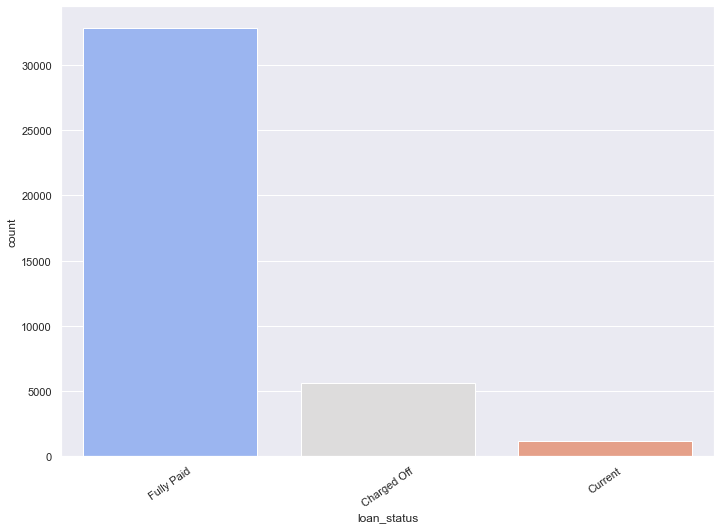

In [79]:
import json 
# As we want to know who willbe default ( charged off we just do a boxplot or countplot of that ). There are people who fully paid most of the time 
plt.xticks(rotation=35)
sns.countplot(data=loan_df_new, x=loan_df_new["loan_status"], palette='coolwarm',order=loan_df_new["loan_status"].value_counts(ascending=False).index)
print(json.dumps(loan_df_new["loan_status"].value_counts().tolist()))
loan_df_new['loan_status'].value_counts()

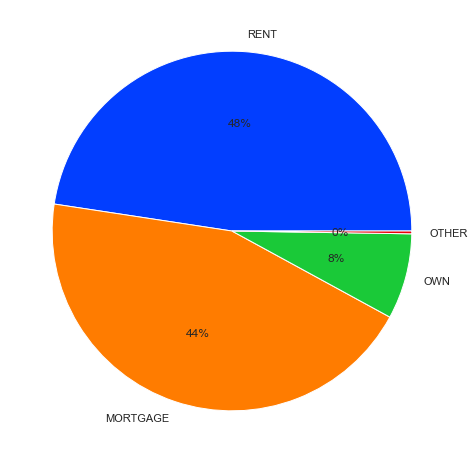

In [77]:
## PieChart
keys = ['RENT', 'MORTGAGE', 'OWN', 'OTHER']
  
# declaring exploding pie
#explode = [0.1, 0.0, 0, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(loan_df_new["home_ownership"].value_counts(), labels=keys, colors=palette_color, autopct='%.0f%%')
#loan_df["home_ownership"].value_counts().plot.pie( autopct='%.0f%%',colors=palette_color)
#displaying chart
plt.show()

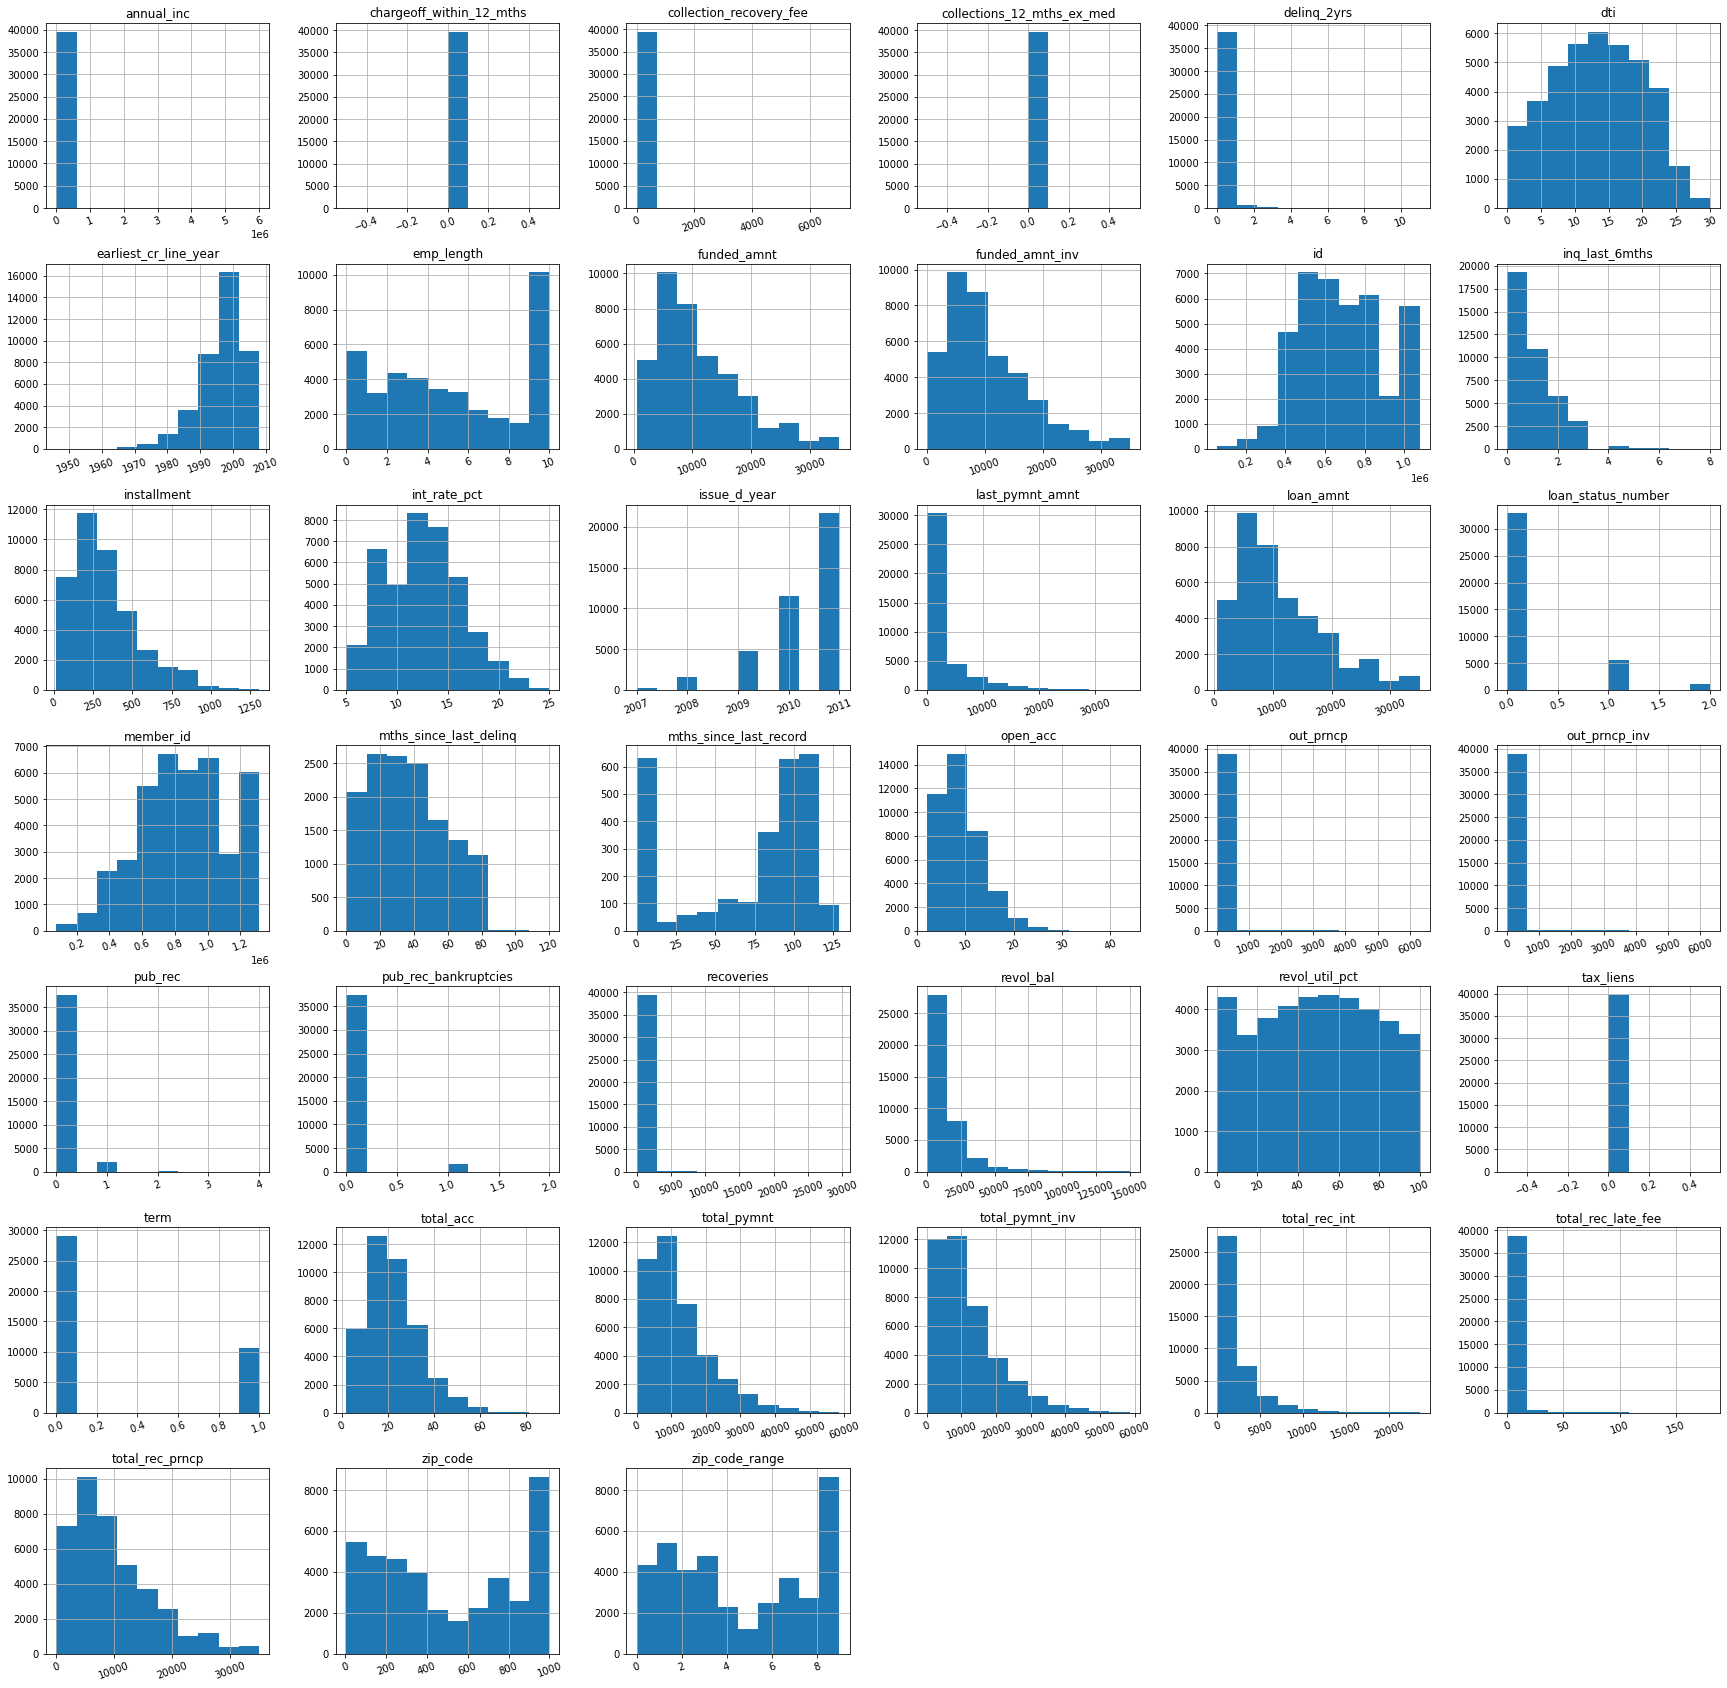

In [16]:
# Univariate analysis - distribution of individual features 
loan_df_new.hist(figsize=(30,30), xrot=20)
plt.xticks(fontsize=0.3)
plt.show()

# Some observations :
# Loan amount distribution skewed between 5K to 10K
# Only 2 Terms of loan - 12 adn 36 months , called 0 and 1
# Majority of loans distribted between 10 - 15% intrest rate
# issue_d could be intresting filed to inspect
# Zip code 800+ has more loan disbursment
# Earliest credit line year between 1998-2000 has more instances to be checked
# last_credit_pull_d has major instances in 2016 



In [17]:
# Let us check now if there are glaring outliers we need to address
interested_columns  = [ 'annual_inc', 'revol_bal' ,'int_rate_pct', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 
                      'emp_length', 'delinq_2yrs',
                     'inq_last_6mths', 'mths_since_last_delinq', 'open_acc',
                      'pub_rec', 'total_acc', 'out_prncp', 
                      'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
                      'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                      'last_pymnt_amnt', 
                      'pub_rec_bankruptcies'
                     ]

describe_df = loan_df_new[interested_columns].describe().T

describe_df['IQR'] = describe_df['75%'] - describe_df['25%']

for col in describe_df.index:
    W1 = loan_df_new[col].quantile(.25) - 1.5 * describe_df.loc[col,'IQR']
    W2 = loan_df_new[col].quantile(.75) + 1.5 * describe_df.loc[col,'IQR']
    describe_df.loc[col,'Whisker1'] = W1
    describe_df.loc[col,'Whisker2'] = W2
    filt = (loan_df_new[col] < W1 ) | (loan_df_new[col] > W2)
    describe_df.loc[col,'max_outliers_value'] = round(loan_df_new[filt][col].max(),2)
    describe_df.loc[col,'min_outliers_value'] = round(loan_df_new[filt][col].min(),2)
    describe_df.loc[col,'no_of_outliers'] = len(loan_df_new[filt][col])
describe_df['no_of_outliers'] = describe_df['no_of_outliers'].astype('int')
describe_df

#loan_df_new[check_outlier_big_nos].boxplot()
#plt.show()

#loan_df_new[check_outlier_small_nos].boxplot()
#plt.show()

# Conclusion - no major outliers apart from interest_rate_pct. However not significant
# in cases where there are outliers, number of such instances are very high like annual income

,count,mean,std,min,25%,50%,75%,max,IQR,Whisker1,Whisker2,max_outliers_value,min_outliers_value,no_of_outliers
annual_inc,39661.0,68944.344064,63793.847392,4000.00,40440.00,59000.000000,82150.00,6.000000e+06,41710.00,-22125.000,144715.000,6000000.00,144996.00,1900
revol_bal,39661.0,13381.838960,15881.312055,0.00,3706.00,8856.000000,17058.00,1.495880e+05,13352.00,-16322.000,37086.000,149588.00,37093.00,2490
int_rate_pct,39661.0,12.014574,3.717805,5.00,9.00,12.000000,15.00,2.500000e+01,6.00,0.000,24.000,25.00,25.00,1
loan_amnt,39661.0,11226.766849,7457.685297,500.00,5500.00,10000.000000,15000.00,3.500000e+04,9500.00,-8750.000,29250.000,35000.00,29275.00,1230
funded_amnt,39661.0,10954.652555,7188.173748,500.00,5400.00,9625.000000,15000.00,3.500000e+04,9600.00,-9000.000,29400.000,35000.00,29500.00,1038
funded_amnt_inv,39661.0,10410.255709,7125.200485,0.00,5000.00,8975.000000,14400.00,3.500000e+04,9400.00,-9100.000,28500.000,35000.00,28513.46,1000
installment,39661.0,324.744712,208.898305,15.69,167.11,280.610000,430.78,1.305190e+03,263.67,-228.395,826.285,1305.19,826.31,1246
emp_length,39661.0,4.841835,3.605316,0.00,2.00,4.000000,9.00,1.000000e+01,7.00,-8.500,19.500,NaN,NaN,0
delinq_2yrs,39661.0,0.146466,0.491844,0.00,0.00,0.000000,0.00,1.100000e+01,0.00,0.000,0.000,11.00,1.00,4304
inq_last_6mths,39661.0,0.869418,1.070235,0.00,0.00,1.000000,1.00,8.000000e+00,1.00,-1.500,2.500,8.00,3.00,3628


# Corelation matrix for bivariant analysis - all numerical columns

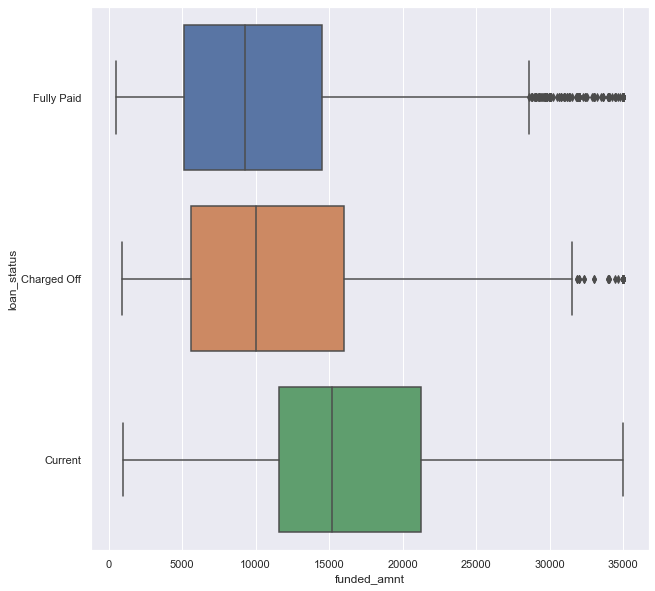

In [75]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'funded_amnt', y = 'loan_status', order=loan_df_new['loan_status'].unique() ,data = loan_df_new)



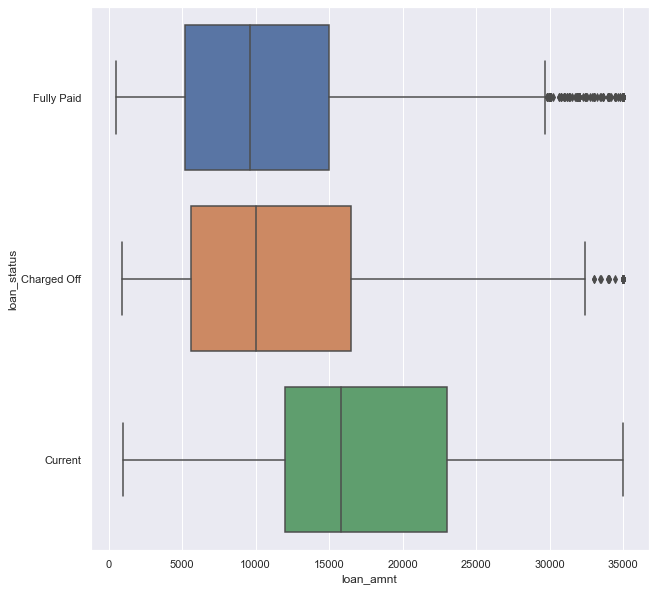

In [81]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'loan_amnt', y = 'loan_status', order=loan_df_new['loan_status'].unique() ,data = loan_df_new)

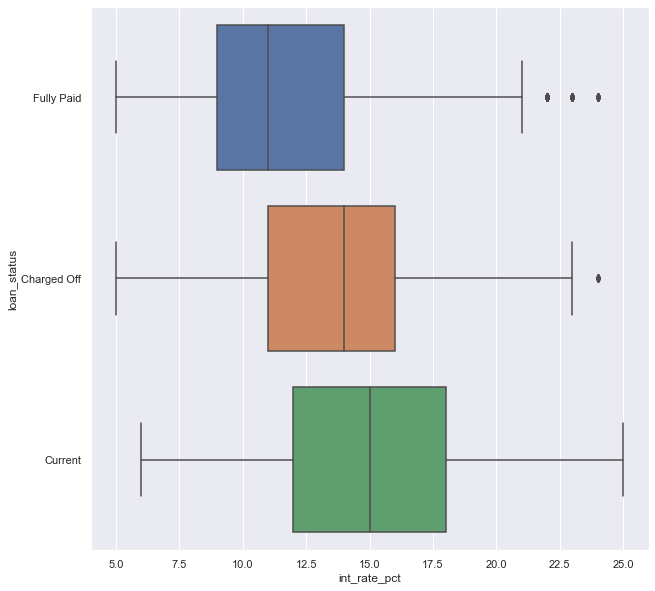

In [83]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'int_rate_pct', y = 'loan_status', order=loan_df_new['loan_status'].unique() ,data = loan_df_new)


'post charge off gross recovery'

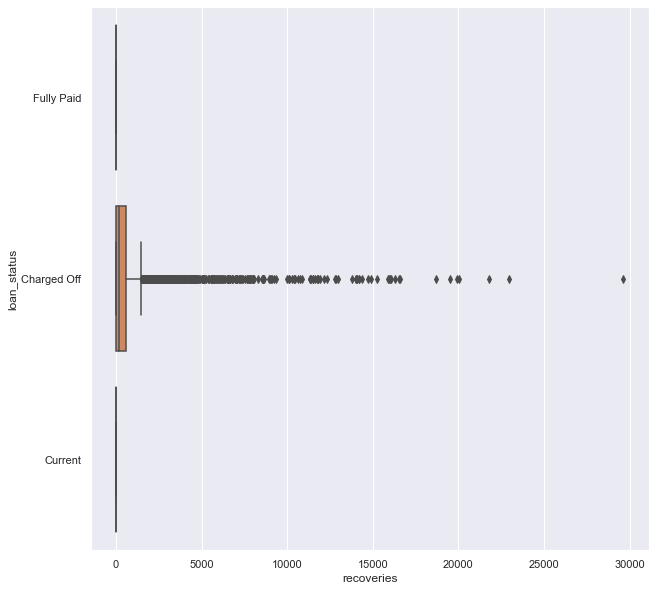

In [86]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'recoveries', y = 'loan_status', order=loan_df_new['loan_status'].unique() , data = loan_df_new)
data_dict.loc['recoveries'][0]

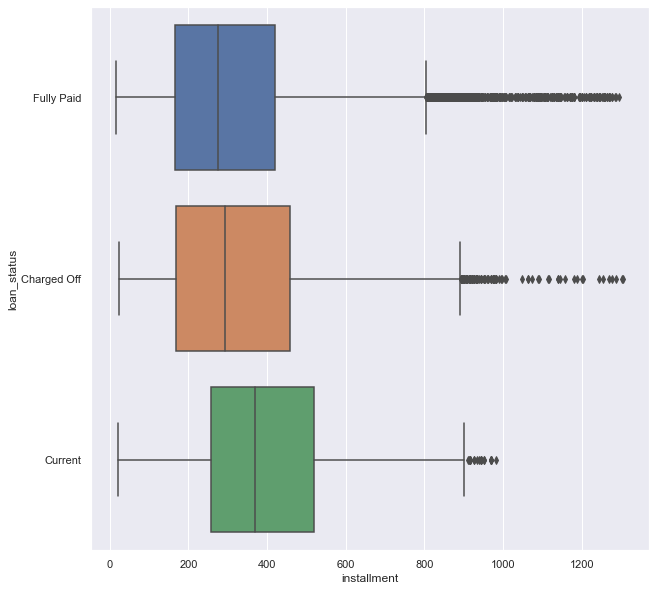

In [84]:

fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'installment', y = 'loan_status', order=loan_df_new['loan_status'].unique() ,data = loan_df_new)



In [18]:
# Corelation matrix for bivariant analysis - all numerical columns

check_corelation_cols = [ 'annual_inc', 'revol_bal' , 'int_rate_pct', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
                         'installment', 'emp_length', 'delinq_2yrs',
                         'inq_last_6mths', 'mths_since_last_delinq', 'open_acc',
                         'pub_rec', 'total_acc', 'out_prncp', 'out_prncp_inv', 
                         'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
                         'total_rec_int', 'total_rec_late_fee', 'recoveries',
                         'collection_recovery_fee','last_pymnt_amnt', 'pub_rec_bankruptcies'
                     ]



corr = loan_df_new[check_corelation_cols].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)



,annual_inc,revol_bal,int_rate_pct,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
annual_inc,1.00,0.28,0.05,0.27,0.27,0.26,0.27,0.12,0.02,0.03,-0.01,0.16,-0.02,0.24,0.03,0.03,0.26,0.25,0.26,0.19,0.01,0.02,0.02,0.14,-0.02
revol_bal,0.28,1.00,0.10,0.32,0.31,0.29,0.31,0.15,-0.06,-0.02,0.01,0.29,-0.06,0.31,0.06,0.06,0.29,0.28,0.28,0.24,0.00,0.04,0.02,0.12,-0.05
int_rate_pct,0.05,0.10,1.00,0.31,0.31,0.31,0.28,0.02,0.16,0.13,-0.06,0.01,0.10,-0.04,0.13,0.13,0.31,0.30,0.19,0.53,0.09,0.12,0.07,0.16,0.08
loan_amnt,0.27,0.32,0.31,1.00,0.98,0.94,0.93,0.16,-0.03,0.01,0.01,0.18,-0.05,0.26,0.19,0.19,0.89,0.85,0.85,0.73,0.04,0.14,0.07,0.45,-0.04
funded_amnt,0.27,0.31,0.31,0.98,1.00,0.96,0.96,0.16,-0.03,0.01,0.01,0.18,-0.05,0.25,0.19,0.19,0.90,0.87,0.87,0.74,0.05,0.14,0.07,0.45,-0.04
funded_amnt_inv,0.26,0.29,0.31,0.94,0.96,1.00,0.91,0.17,-0.04,-0.01,0.07,0.16,-0.05,0.24,0.20,0.20,0.88,0.91,0.85,0.73,0.03,0.12,0.06,0.44,-0.04
installment,0.27,0.31,0.28,0.93,0.96,0.91,1.00,0.13,-0.02,0.01,-0.00,0.17,-0.05,0.23,0.13,0.12,0.86,0.82,0.85,0.63,0.06,0.12,0.08,0.40,-0.03
emp_length,0.12,0.15,0.02,0.16,0.16,0.17,0.13,1.00,0.02,0.01,0.04,0.10,0.05,0.20,0.05,0.05,0.15,0.16,0.14,0.13,-0.01,0.02,0.01,0.08,0.05
delinq_2yrs,0.02,-0.06,0.16,-0.03,-0.03,-0.04,-0.02,0.02,1.00,0.01,-0.57,0.01,0.01,0.07,-0.00,-0.00,-0.02,-0.03,-0.04,0.02,0.03,0.01,0.01,-0.01,0.00
inq_last_6mths,0.03,-0.02,0.13,0.01,0.01,-0.01,0.01,0.01,0.01,1.00,-0.01,0.09,0.02,0.11,-0.01,-0.01,-0.01,-0.02,-0.02,0.02,0.03,0.02,0.01,0.03,0.02


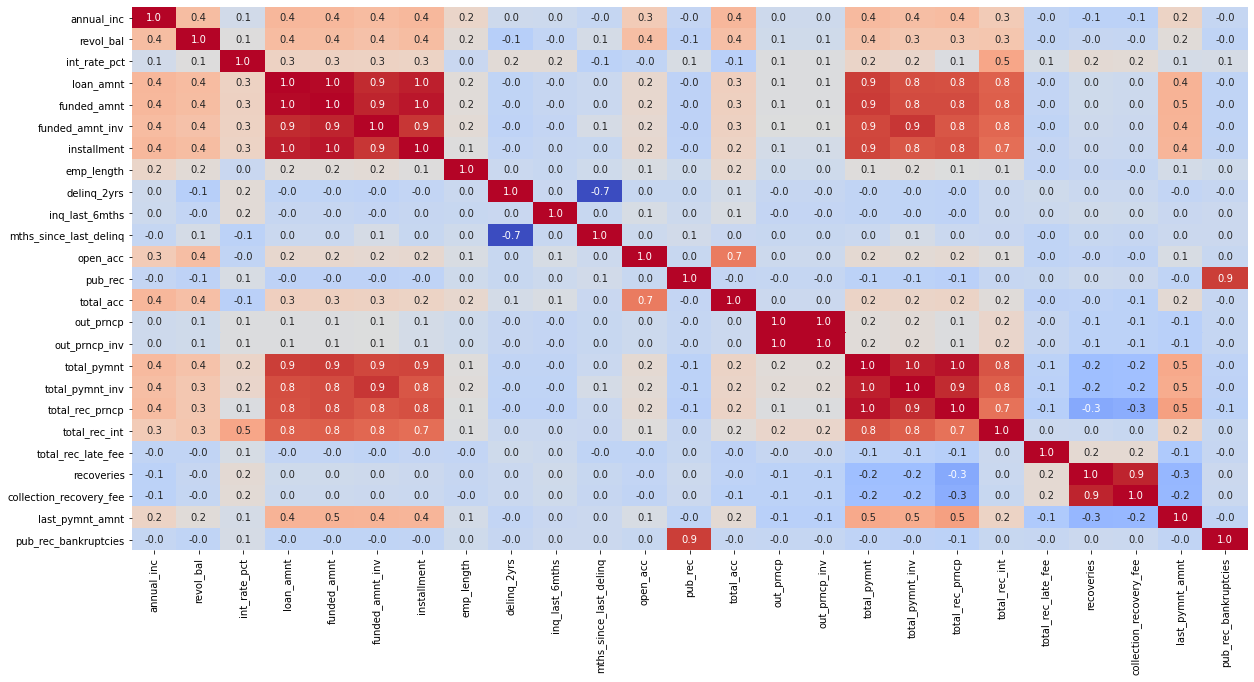

In [19]:
# Similar step as above , but saving file to terminal for detail close view

fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(loan_df_new[check_corelation_cols].corr(method='spearman'), annot=True, fmt='.1f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('loan_result.png', bbox_inches='tight', pad_inches=0.0)

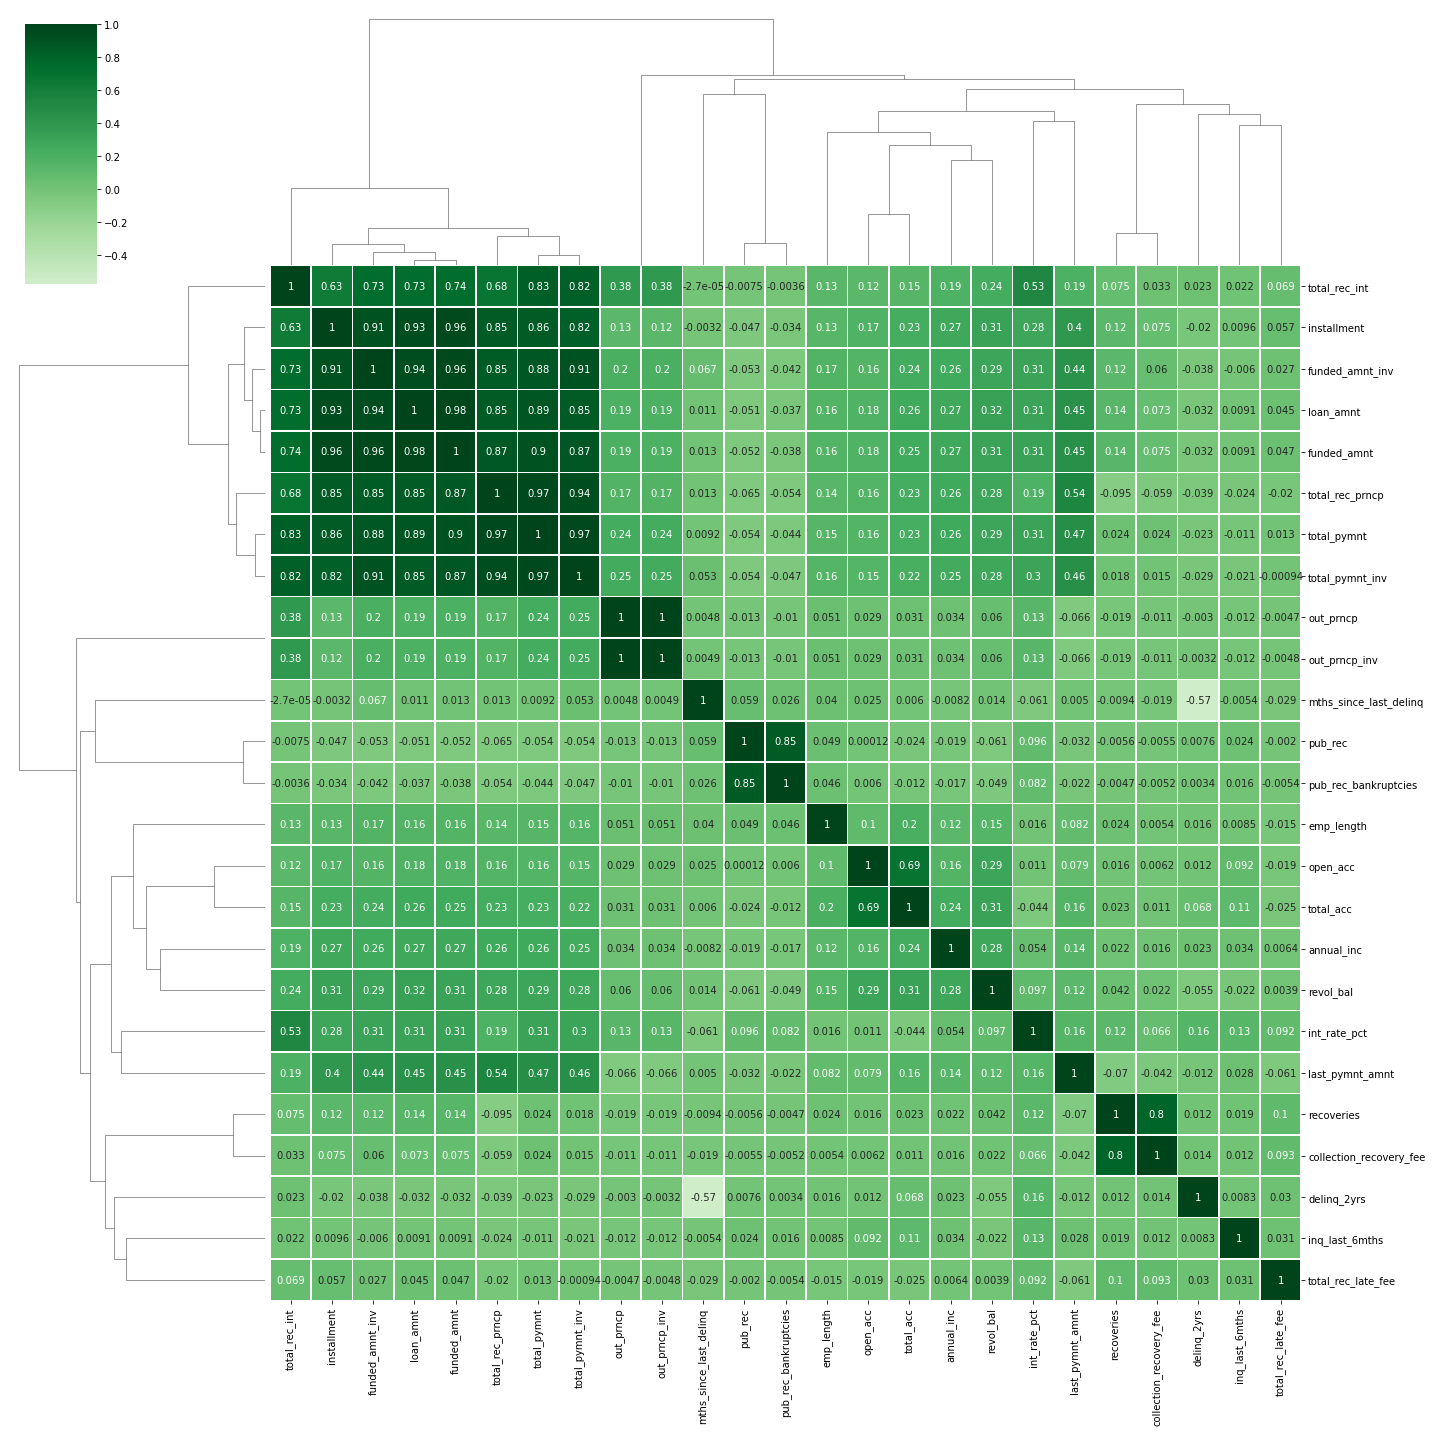

In [20]:
# Let us check hierarchical corelation as well
sns.clustermap(loan_df_new[check_corelation_cols].corr(), center = 0, cmap = 'Greens', linewidths = 0.75, figsize = (20, 20), annot=True)
plt.show()

In [21]:
# Now let us check which features are categorical in our data ( i.e. not numerical )

loan_df_categorical = loan_df_new[loan_df_new.columns[~loan_df_new.columns.isin(check_corelation_cols)]]
loan_df_categorical.head()

,id,member_id,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,earliest_cr_line,mths_since_last_record,revol_util_pct,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,tax_liens,earliest_cr_line_year,issue_d_year,loan_status_number,zip_code_range
0,1077501,1296599,0,B,B2,RENT,Verified,2011-12-01,Fully Paid,credit_card,860,AZ,27.65,1985-01-01,NaN,84.0,2015-01-01,NaT,2016-05-01,0.0,0.0,0.0,1985,2011,0,8
1,1077430,1314167,1,C,C4,RENT,Source Verified,2011-12-01,Charged Off,car,309,GA,1.00,1999-04-01,NaN,9.0,2013-04-01,NaT,2013-09-01,0.0,0.0,0.0,1999,2011,1,3
2,1077175,1313524,0,C,C5,RENT,Not Verified,2011-12-01,Fully Paid,small_business,606,IL,8.72,2001-11-01,NaN,98.0,2014-06-01,NaT,2016-05-01,0.0,0.0,0.0,2001,2011,0,6
3,1076863,1277178,0,C,C1,RENT,Source Verified,2011-12-01,Fully Paid,other,917,CA,20.00,1996-02-01,NaN,21.0,2015-01-01,NaT,2016-04-01,0.0,0.0,0.0,1996,2011,0,9
4,1075358,1311748,1,B,B5,RENT,Source Verified,2011-12-01,Current,other,972,OR,17.94,1996-01-01,NaN,54.0,2016-05-01,2016-06-01,2016-05-01,0.0,0.0,0.0,1996,2011,2,9


# Bivariate analysis using pivot table and scatter plots

In [22]:
# Let us check pivot table relationship - bivariate analysis
# Percentage is better to analyse rather than pure #s

# let us define functions here
agg_func = lambda x: round((100*x.count()/loan_df_new.shape[0]),2)

def make_pivot(index,val,col='loan_status'):
    derived_loan = pd.DataFrame()
    derived_loan = loan_df_new.pivot_table(values = val,index = index,columns = col , aggfunc=len,fill_value=0)
    derived_loan['Percent_Charged_off'] = round(derived_loan['Charged Off'] / derived_loan.sum(axis=1) *100,2)
    x_data = derived_loan.index
    y_data = derived_loan['Percent_Charged_off']
    return x_data,y_data,derived_loan.sort_values('Percent_Charged_off',ascending=False)

def draw_graph(x_data,y_data,figsize=(20,20)):
    fig,ax = plt.subplots(figsize=figsize)
    sns.lineplot(data = y_data,estimator=np.mean)
    sns.barplot(x = x_data, y = y_data,estimator=np.mean)

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
home_ownership,,,,
OTHER,18,0,81,18.18
RENT,2839,419,15621,15.04
OWN,443,83,2526,14.52
MORTGAGE,2321,638,14672,13.16


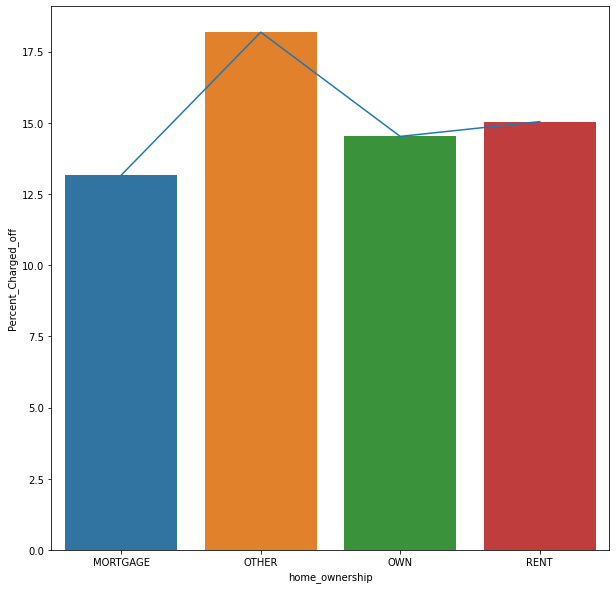

In [23]:
# loan_status vs home_ownership
x_data,y_data,pivot_data = make_pivot('home_ownership','member_id')
draw_graph(x_data,y_data,(10,10))
pivot_data

# Conclusion - No particular relation with home_ownership and defaulting or non-defaulting customers.

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
int_rate_pct,,,,
23.0,21,7,21,42.86
22.0,78,24,93,40.00
24.0,9,5,14,32.14
20.0,158,51,288,31.79
21.0,109,45,199,30.88
19.0,237,93,551,26.90
18.0,298,100,797,24.94
17.0,374,111,1037,24.57
16.0,567,67,2046,21.16


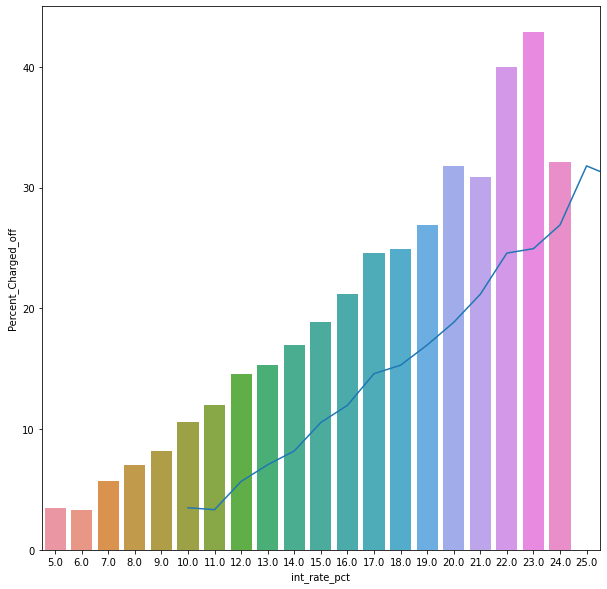

In [24]:
# loan_status vs interest rate
x_data,y_data,pivot_data = make_pivot('int_rate_pct','member_id')
draw_graph(x_data,y_data,(10,10))
pivot_data

# Conclusion - >10% as interest rate have higher default rate, % of defaults increase with every interest rate change

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
grade,,,,
G,101,17,198,31.96
F,318,73,656,30.37
E,714,179,1946,25.15
D,1117,222,3964,21.06
C,1345,264,6477,16.63
B,1424,345,10237,11.86
A,602,40,9422,5.98


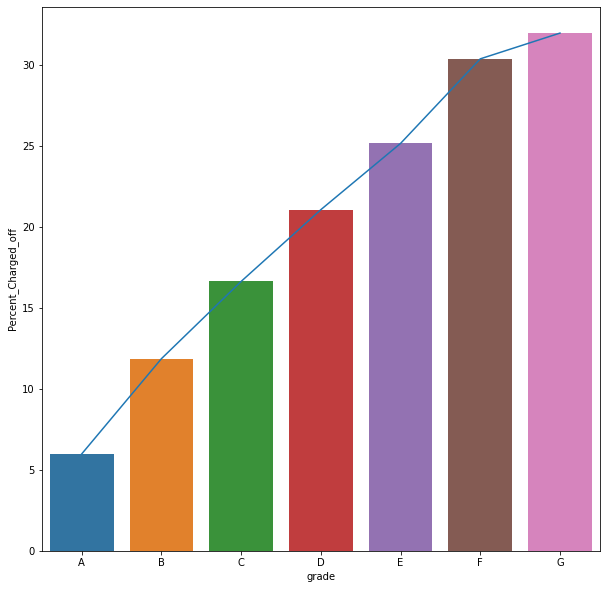

In [25]:
# loan_status vs Grade
x_data,y_data,pivot_data = make_pivot('grade','member_id')
draw_graph(x_data,y_data,(10,10))
pivot_data

# Conclusion - E, F, G in particular and in general as grade increases, higher defaulting risks from approved loan requests

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
zip_code_range,,,,
3,780,141,3839,16.39
9,1365,199,7079,15.79
8,402,88,2208,14.90
6,343,79,2051,13.87
5,167,34,1021,13.67
0,588,138,3632,13.49
2,553,123,3426,13.48
4,303,75,1904,13.28
1,684,164,4576,12.61


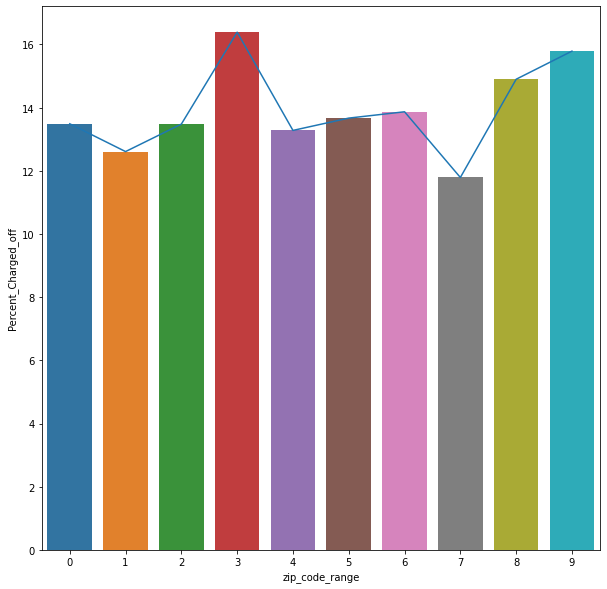

In [26]:
# loan_status vs zip_code range

x_data,y_data,pivot_data = make_pivot('zip_code_range','member_id')
draw_graph(x_data,y_data,(10,10))
pivot_data

# conclusion - Zip code ranges 300xx-400xx , 900xx+ and 800xx-900xx have higher defaulting tendency

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
addr_state,,,,
NE,1,0,2,33.33
NV,108,18,371,21.73
AK,15,2,63,18.75
SD,12,2,50,18.75
FL,503,85,2273,17.58
ID,1,0,5,16.67
MO,114,16,556,16.62
HI,28,8,138,16.09
NM,30,6,153,15.87


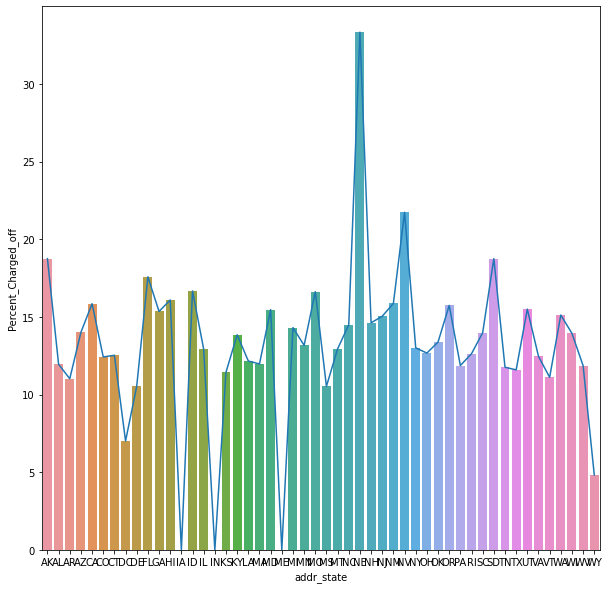

In [27]:
# loan_status vs addr_state, must be linked to zip code analysis

x_data,y_data,pivot_data = make_pivot('addr_state','member_id')
draw_graph(x_data,y_data,(10,10))
pivot_data

# conclusion - NE state stands out in percentage terms, in absolute terms, CA has higher defaulting rate

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
verification_status,,,,
Verified,2051,603,10155,16.01
Source Verified,1434,310,8243,14.36
Not Verified,2136,227,14502,12.67


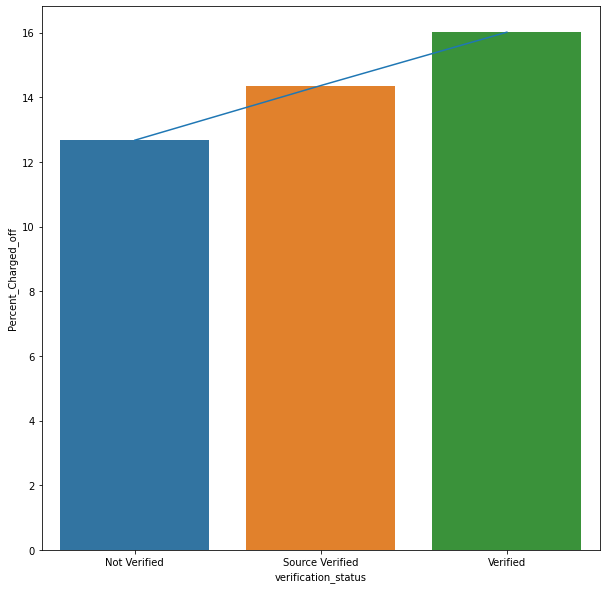

In [28]:
# loan_status vs verification status

x_data,y_data,pivot_data = make_pivot('verification_status','member_id')
draw_graph(x_data,y_data,(10,10))
pivot_data

# conclusion - no observation in particular

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
purpose,,,,
small_business,474,74,1275,26.00
renewable_energy,19,1,83,18.45
educational,56,0,266,17.39
other,633,128,3226,15.88
moving,92,7,482,15.83
house,59,14,307,15.53
medical,106,12,575,15.30
debt_consolidation,2766,586,15276,14.85
vacation,53,6,320,13.98


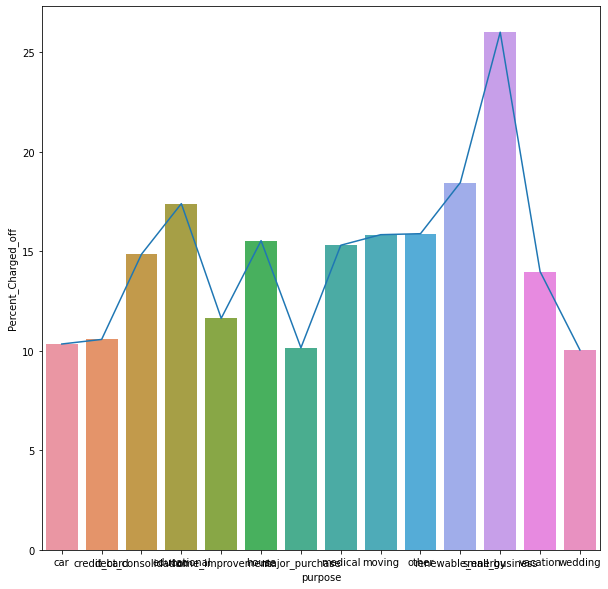

In [29]:
# loan_status vs purpose
x_data,y_data,pivot_data = make_pivot('purpose','member_id')
draw_graph(x_data,y_data,(10,10))
pivot_data

# conclusion - by absolute terms and percentage terms - 'small business' and 'debt consolidation' 
# have higher default


loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
earliest_cr_line_year,,,,
1962,2,0,3,40.00
1967,5,0,13,27.78
1968,5,1,14,25.00
2007,144,14,554,20.22
2006,224,15,930,19.16
1979,31,8,126,18.79
1966,2,0,9,18.18
1973,12,5,49,18.18
2008,28,6,125,17.61


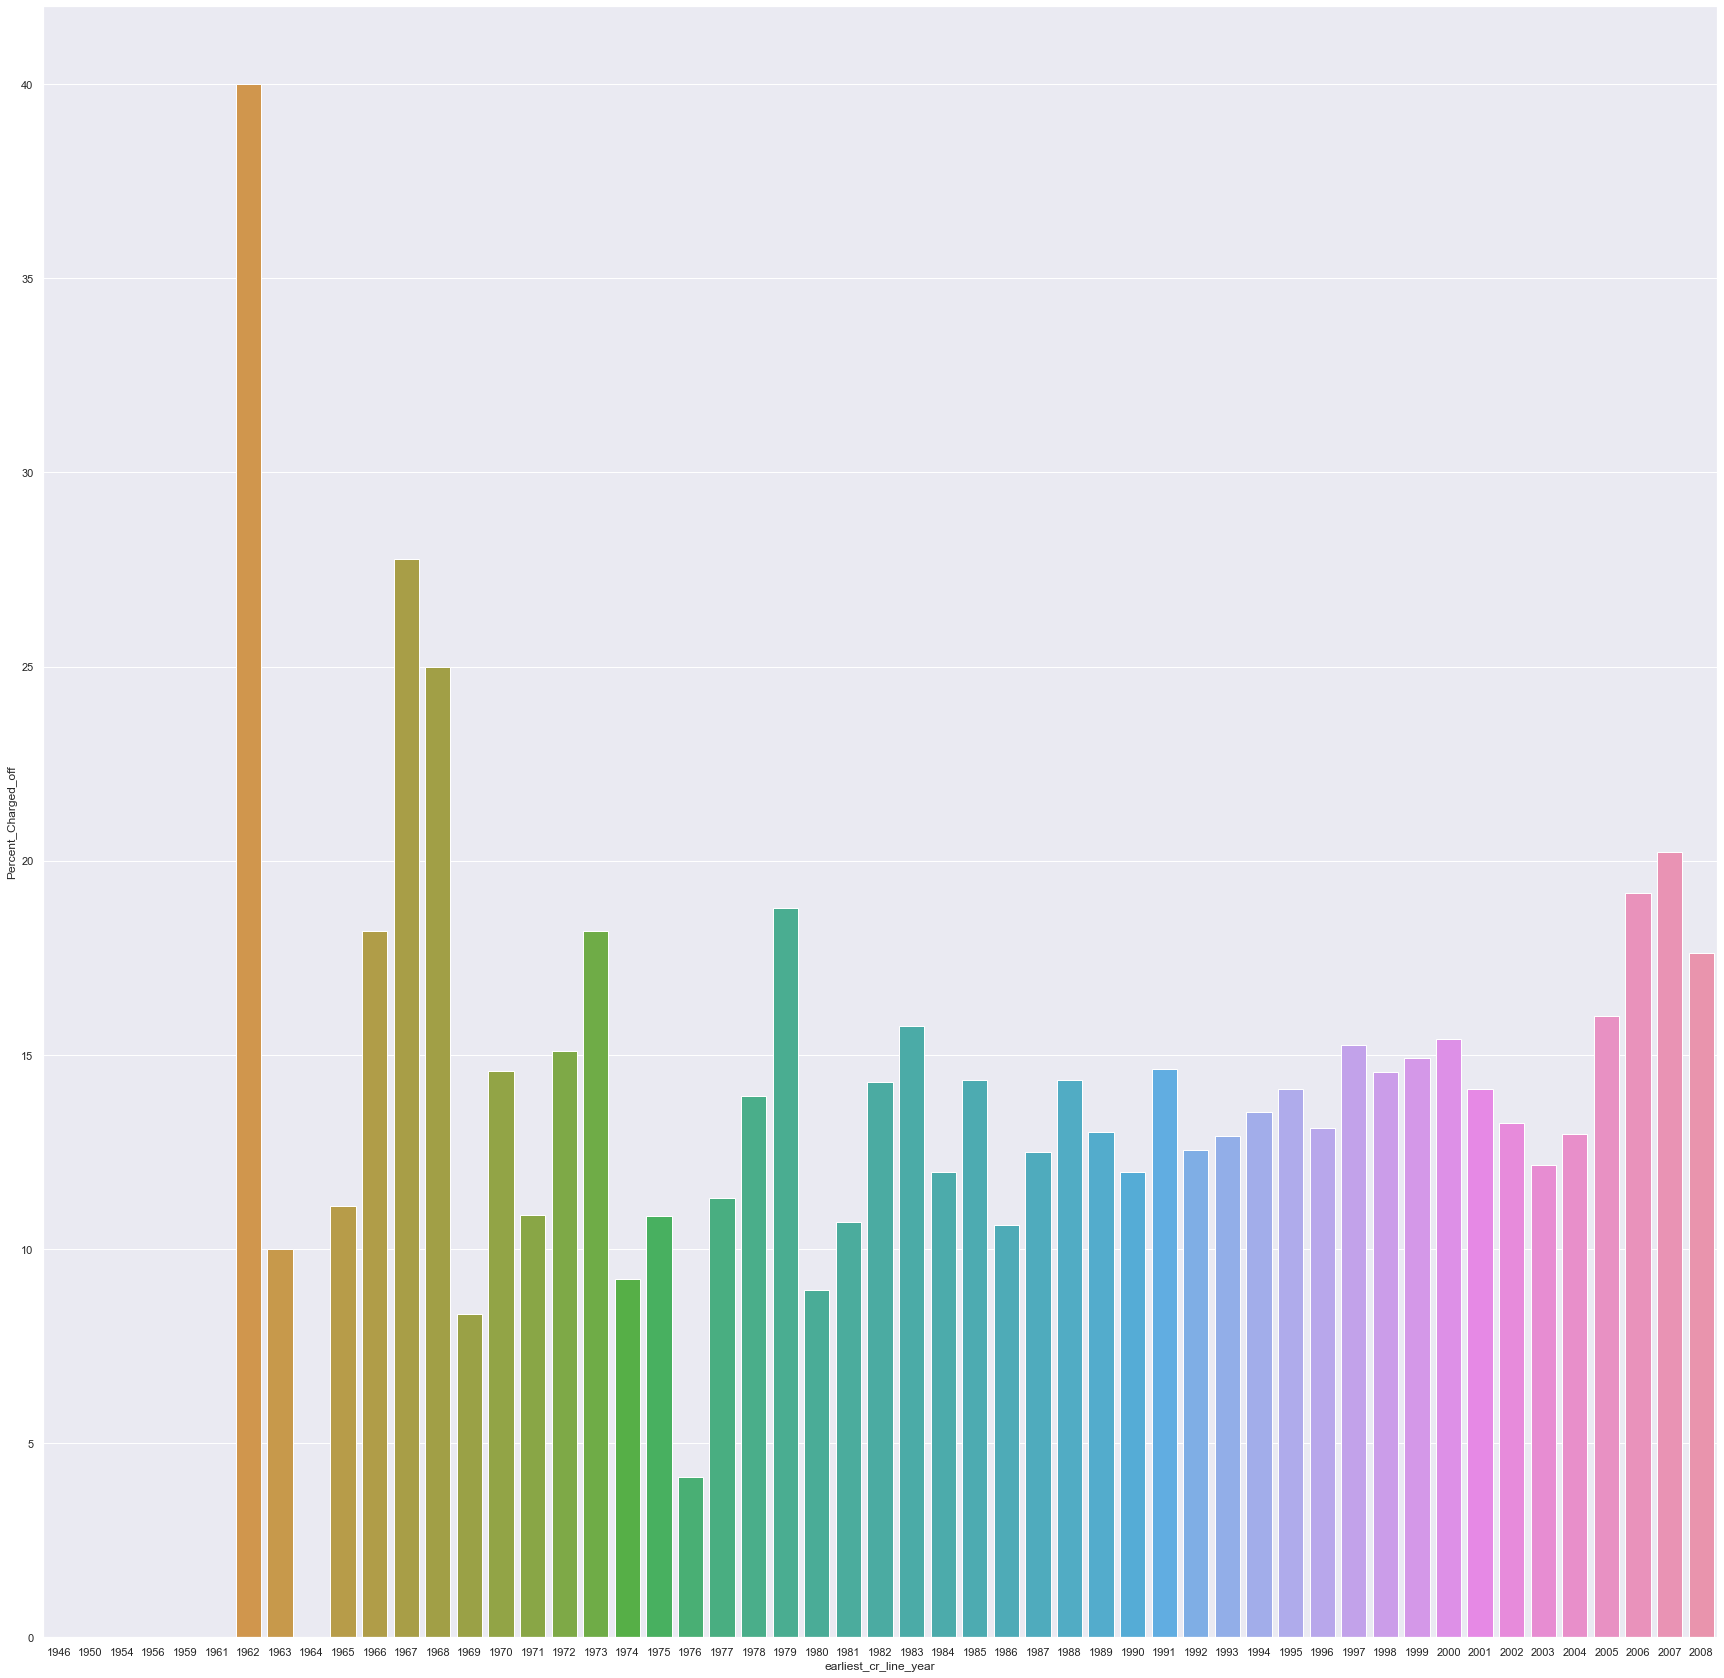

In [51]:
# loan_status vs earlier_cr_line_year

x_data,y_data,pivot_data = make_pivot('earliest_cr_line_year','member_id')
draw_graph(x_data,y_data,(30,30))
pivot_data

# conclusion -  whoever have 2006/2007 as initial credit line year , have higher defaulting rate

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
issue_d_year,,,,
2007,39,0,156,20.00
2008,247,0,1315,15.81
2011,3256,1140,17260,15.04
2010,1485,0,10047,12.88
2009,594,0,4122,12.60


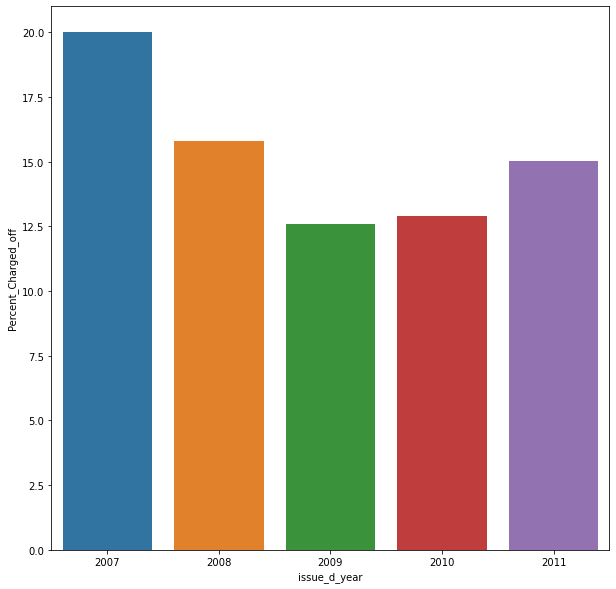

In [31]:
# loan_status vs issue_d_year

x_data,y_data,pivot_data = make_pivot('issue_d_year','member_id')
draw_graph(x_data,y_data,(10,10))
pivot_data

# conclusion -  %wise higher defaults in 2007, however absolute number wise 2011 was special year as well

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
term,,,,
1,2400,1140,7081,22.60
0,3221,0,25819,11.09


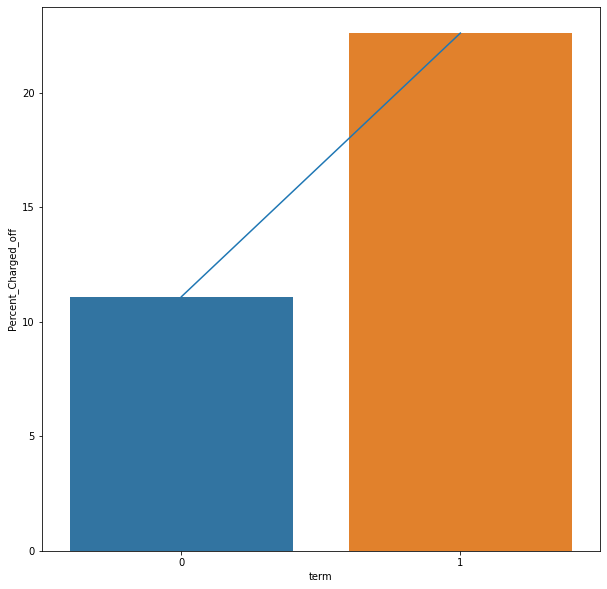

In [32]:
# loan_status vs term

x_data,y_data,pivot_data = make_pivot('term','member_id')
draw_graph(x_data,y_data,(10,10))
pivot_data

# conclusion - longer term loans ( 36 months) have higer risk than shorter term loans 

loan_status,Charged Off,Current,Fully Paid,Percent_Charged_off
emp_length,,,,
0,865,117,4658,15.34
10,1331,391,7154,15.00
7,263,62,1446,14.85
1,456,71,2703,14.12
5,458,88,2734,13.96
6,306,61,1860,13.74
8,203,44,1230,13.74
3,555,83,3453,13.57
4,462,94,2876,13.46


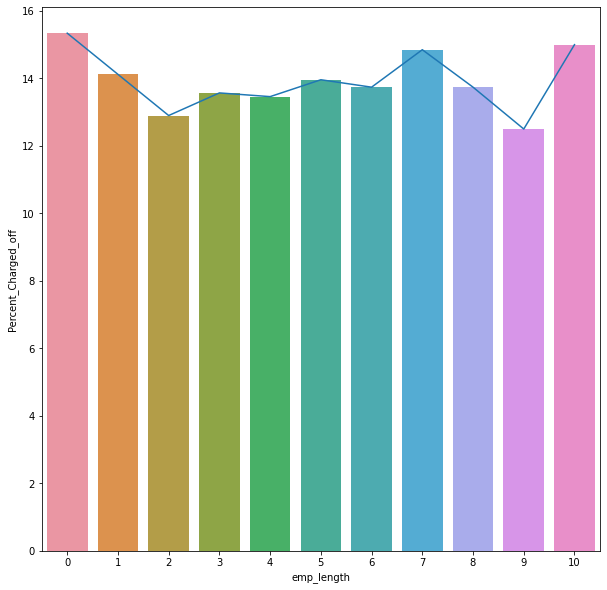

In [33]:
# loan_status vs employement length

x_data,y_data,pivot_data = make_pivot('emp_length','member_id')
draw_graph(x_data,y_data,(10,10))
pivot_data

# conclusion - 10+ year employment length carries more risk , but could be catch-all condition
# also , most of the %s are similar for all types of employment lengths.

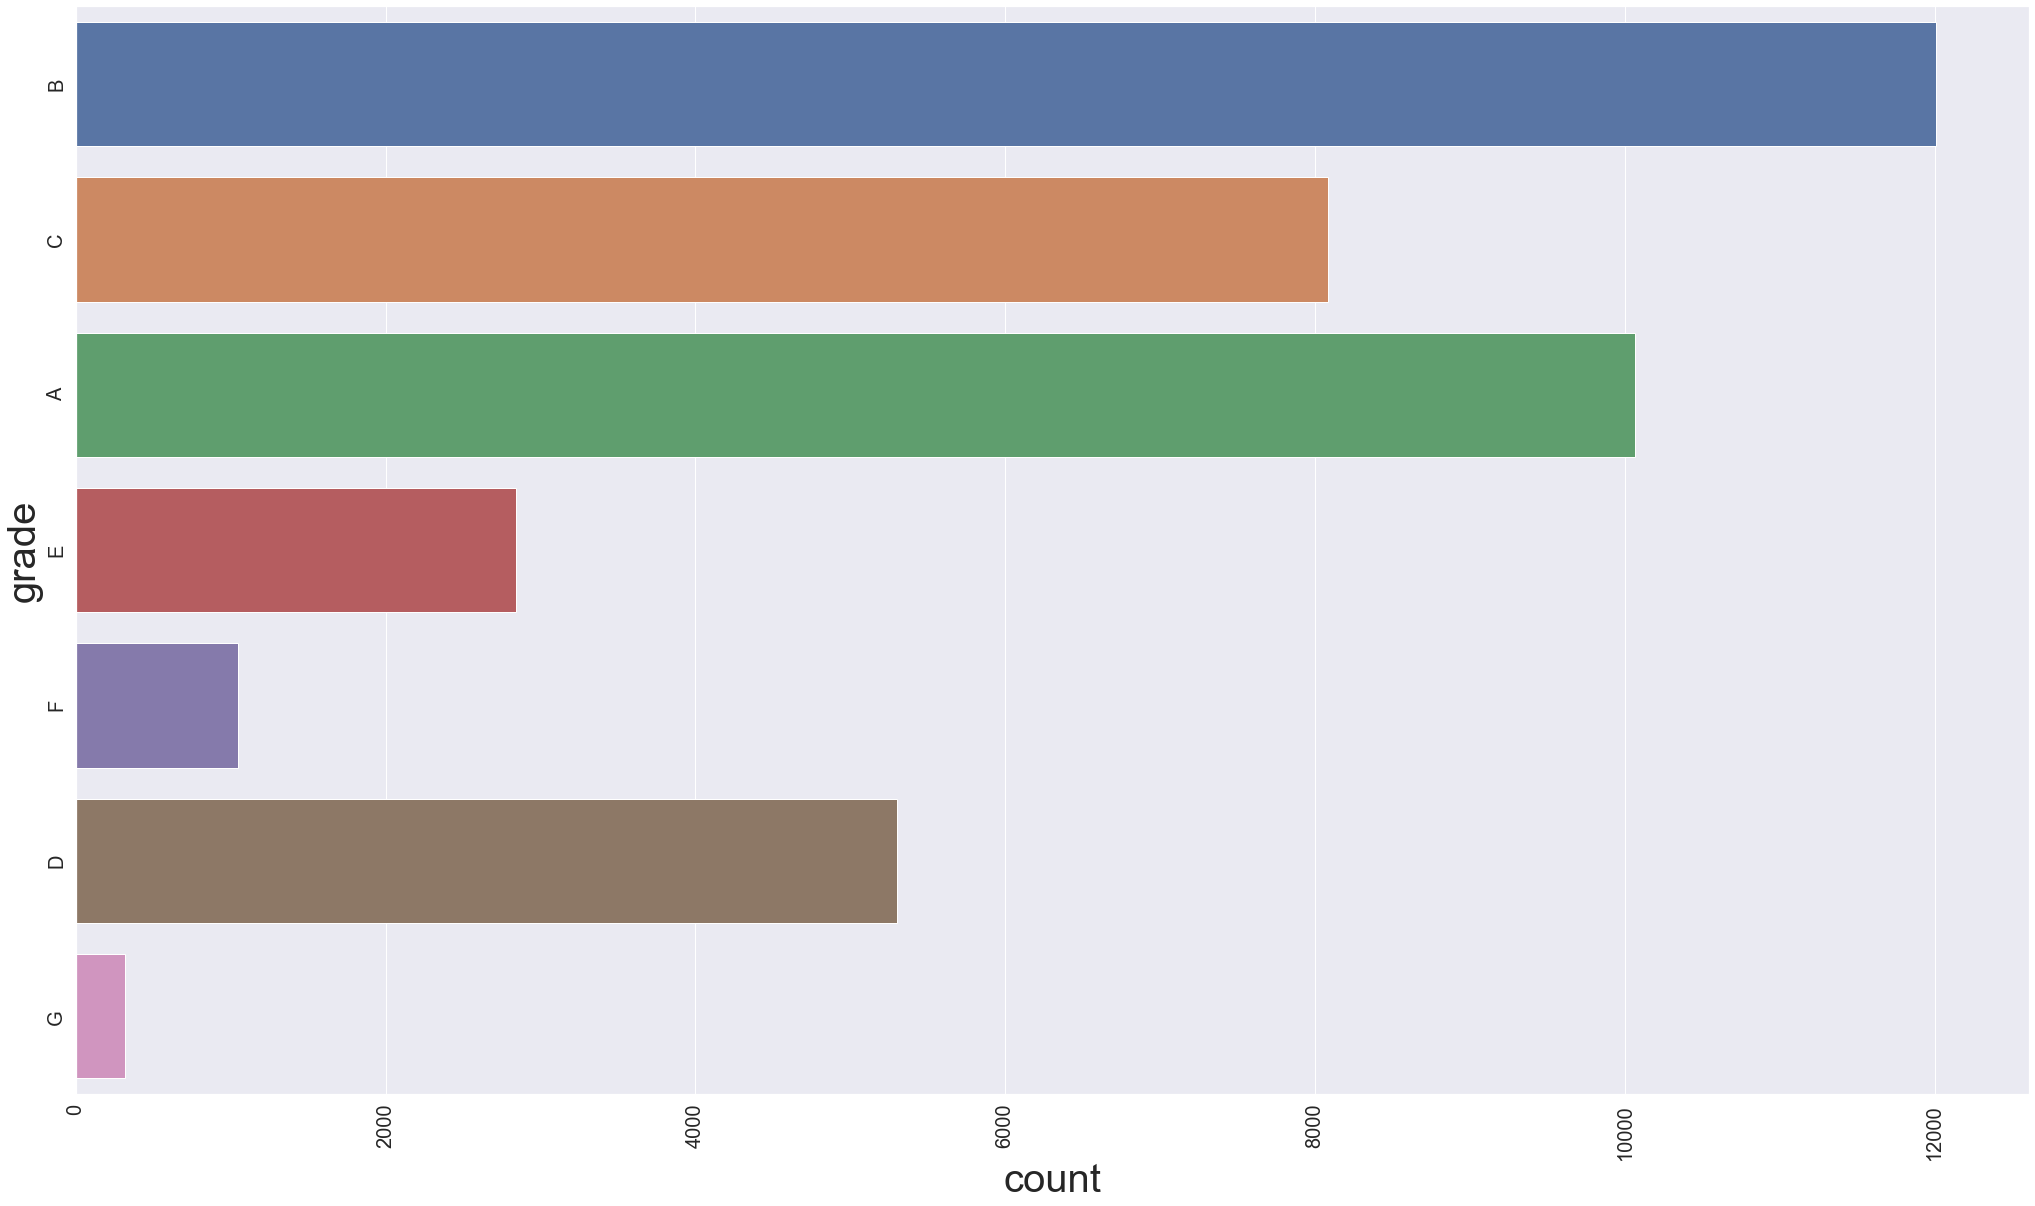

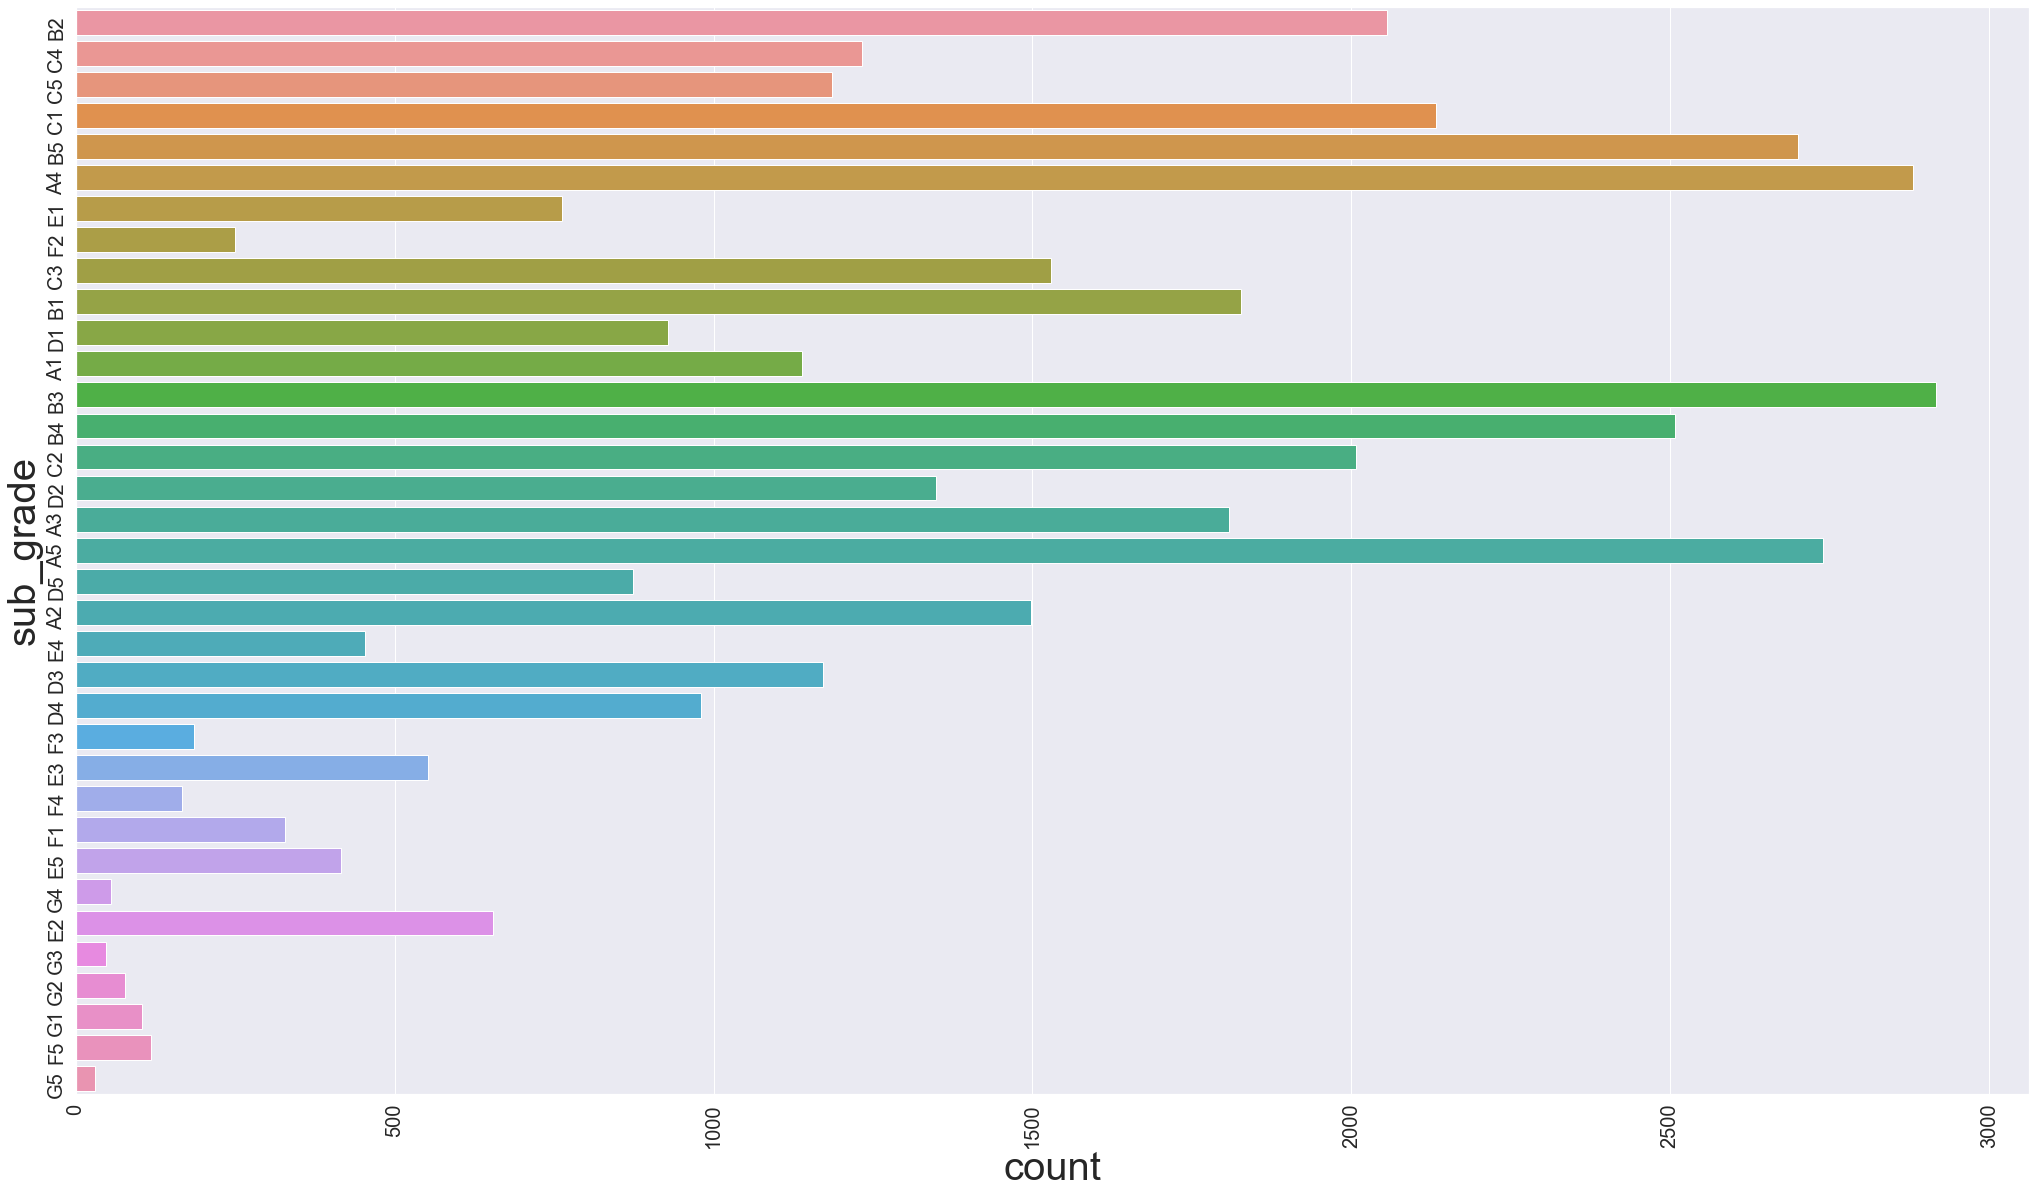

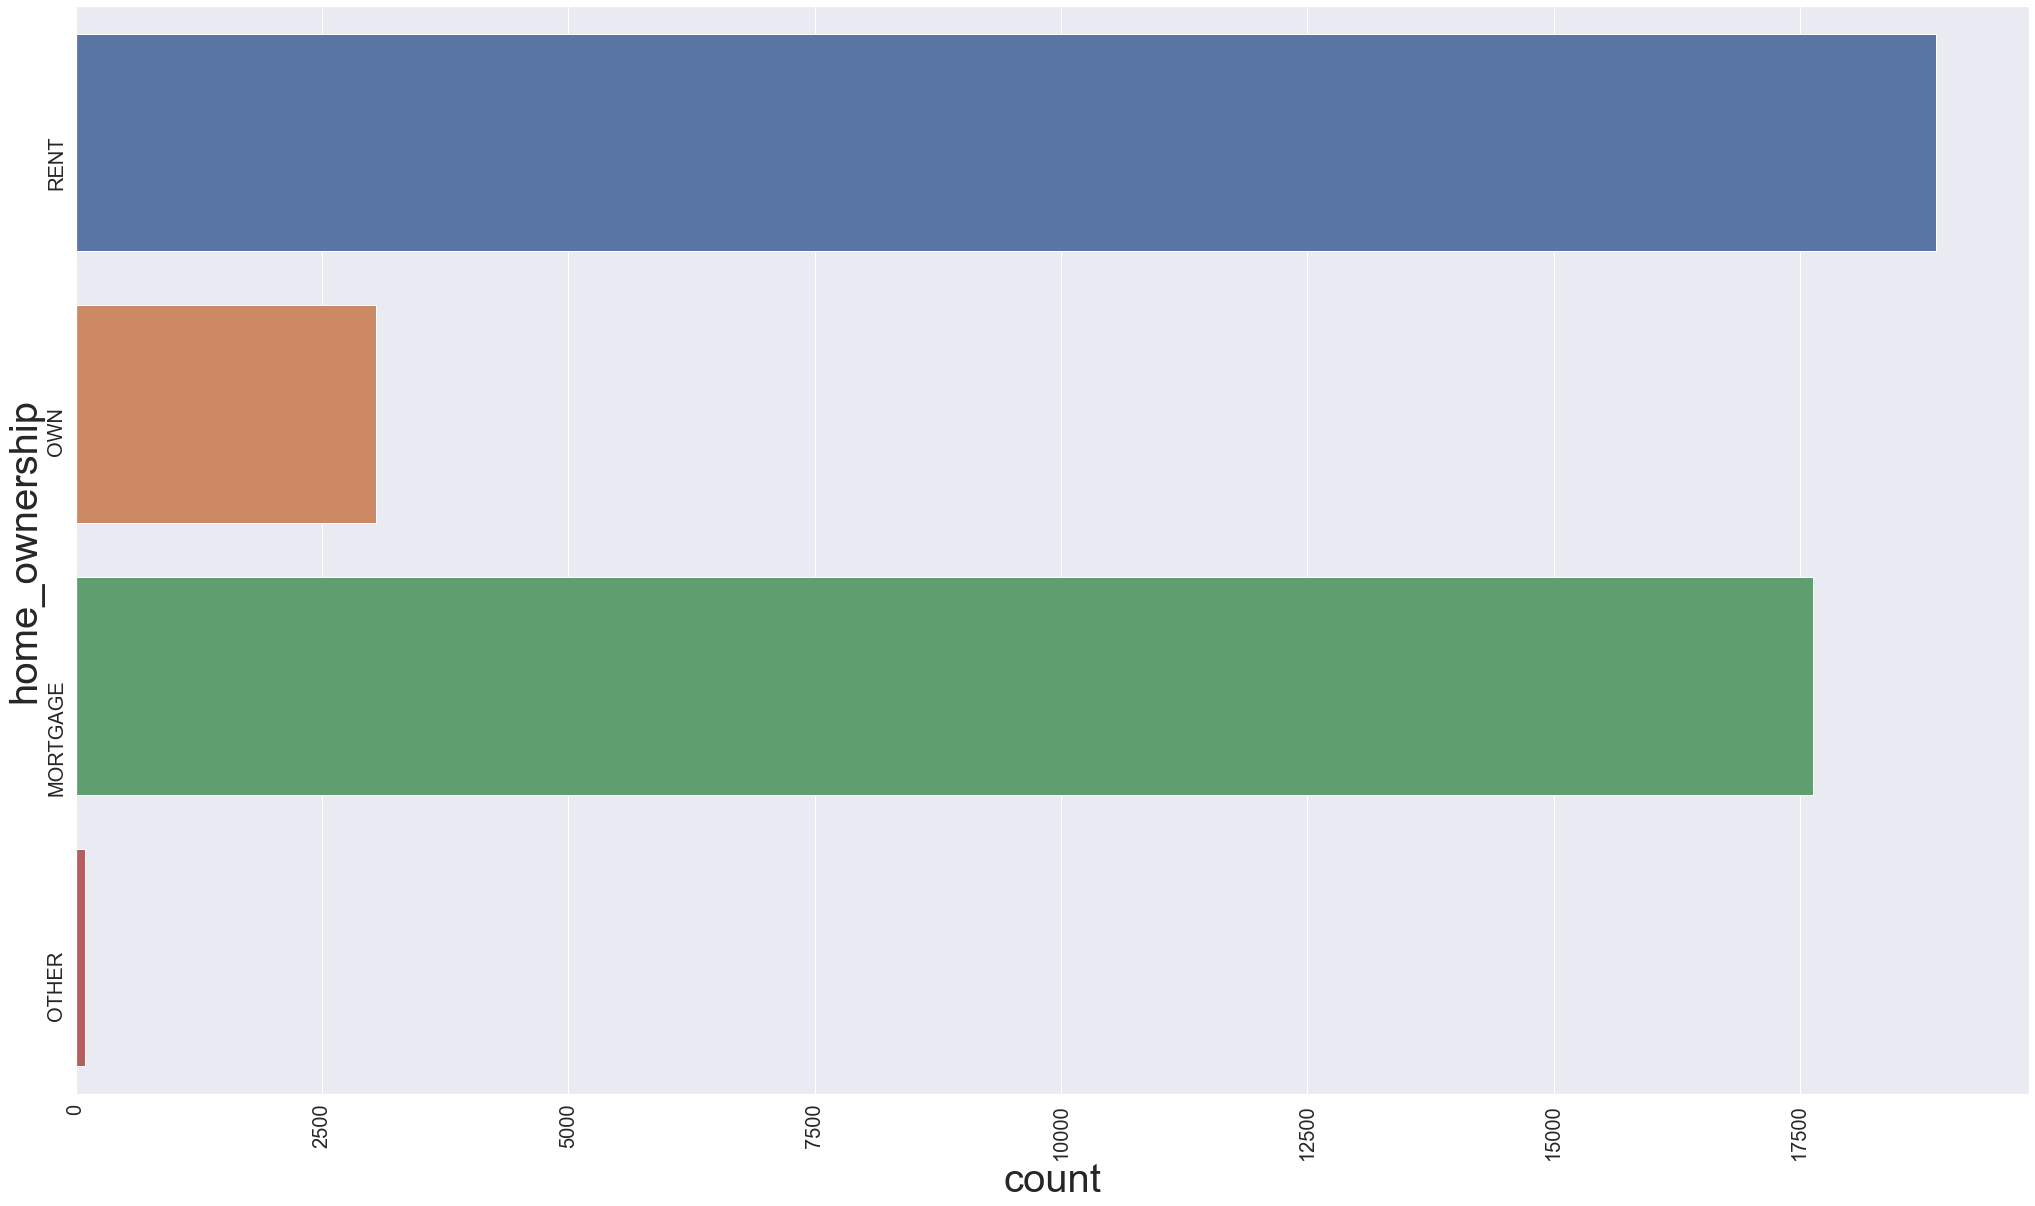

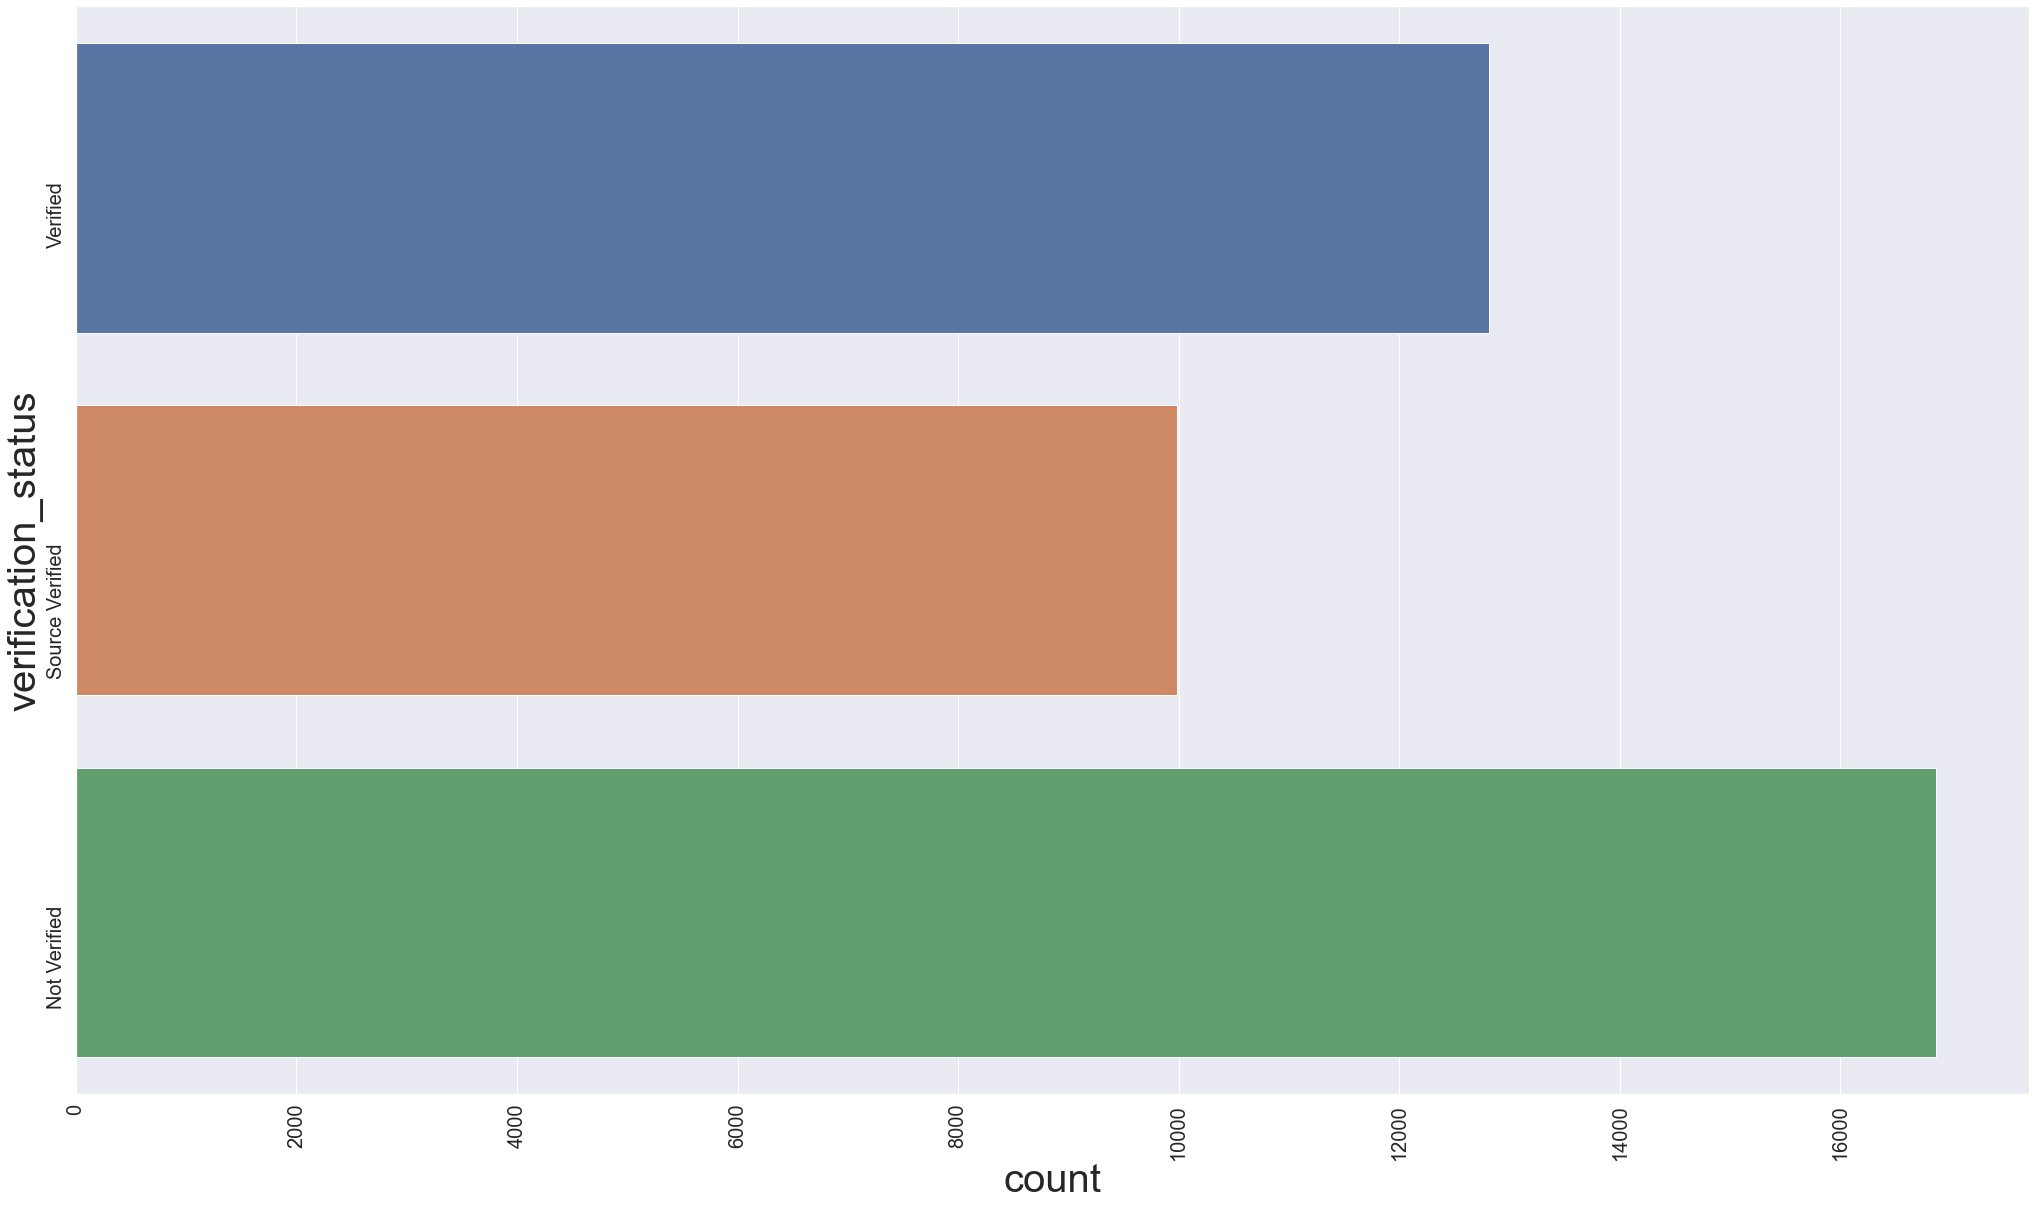

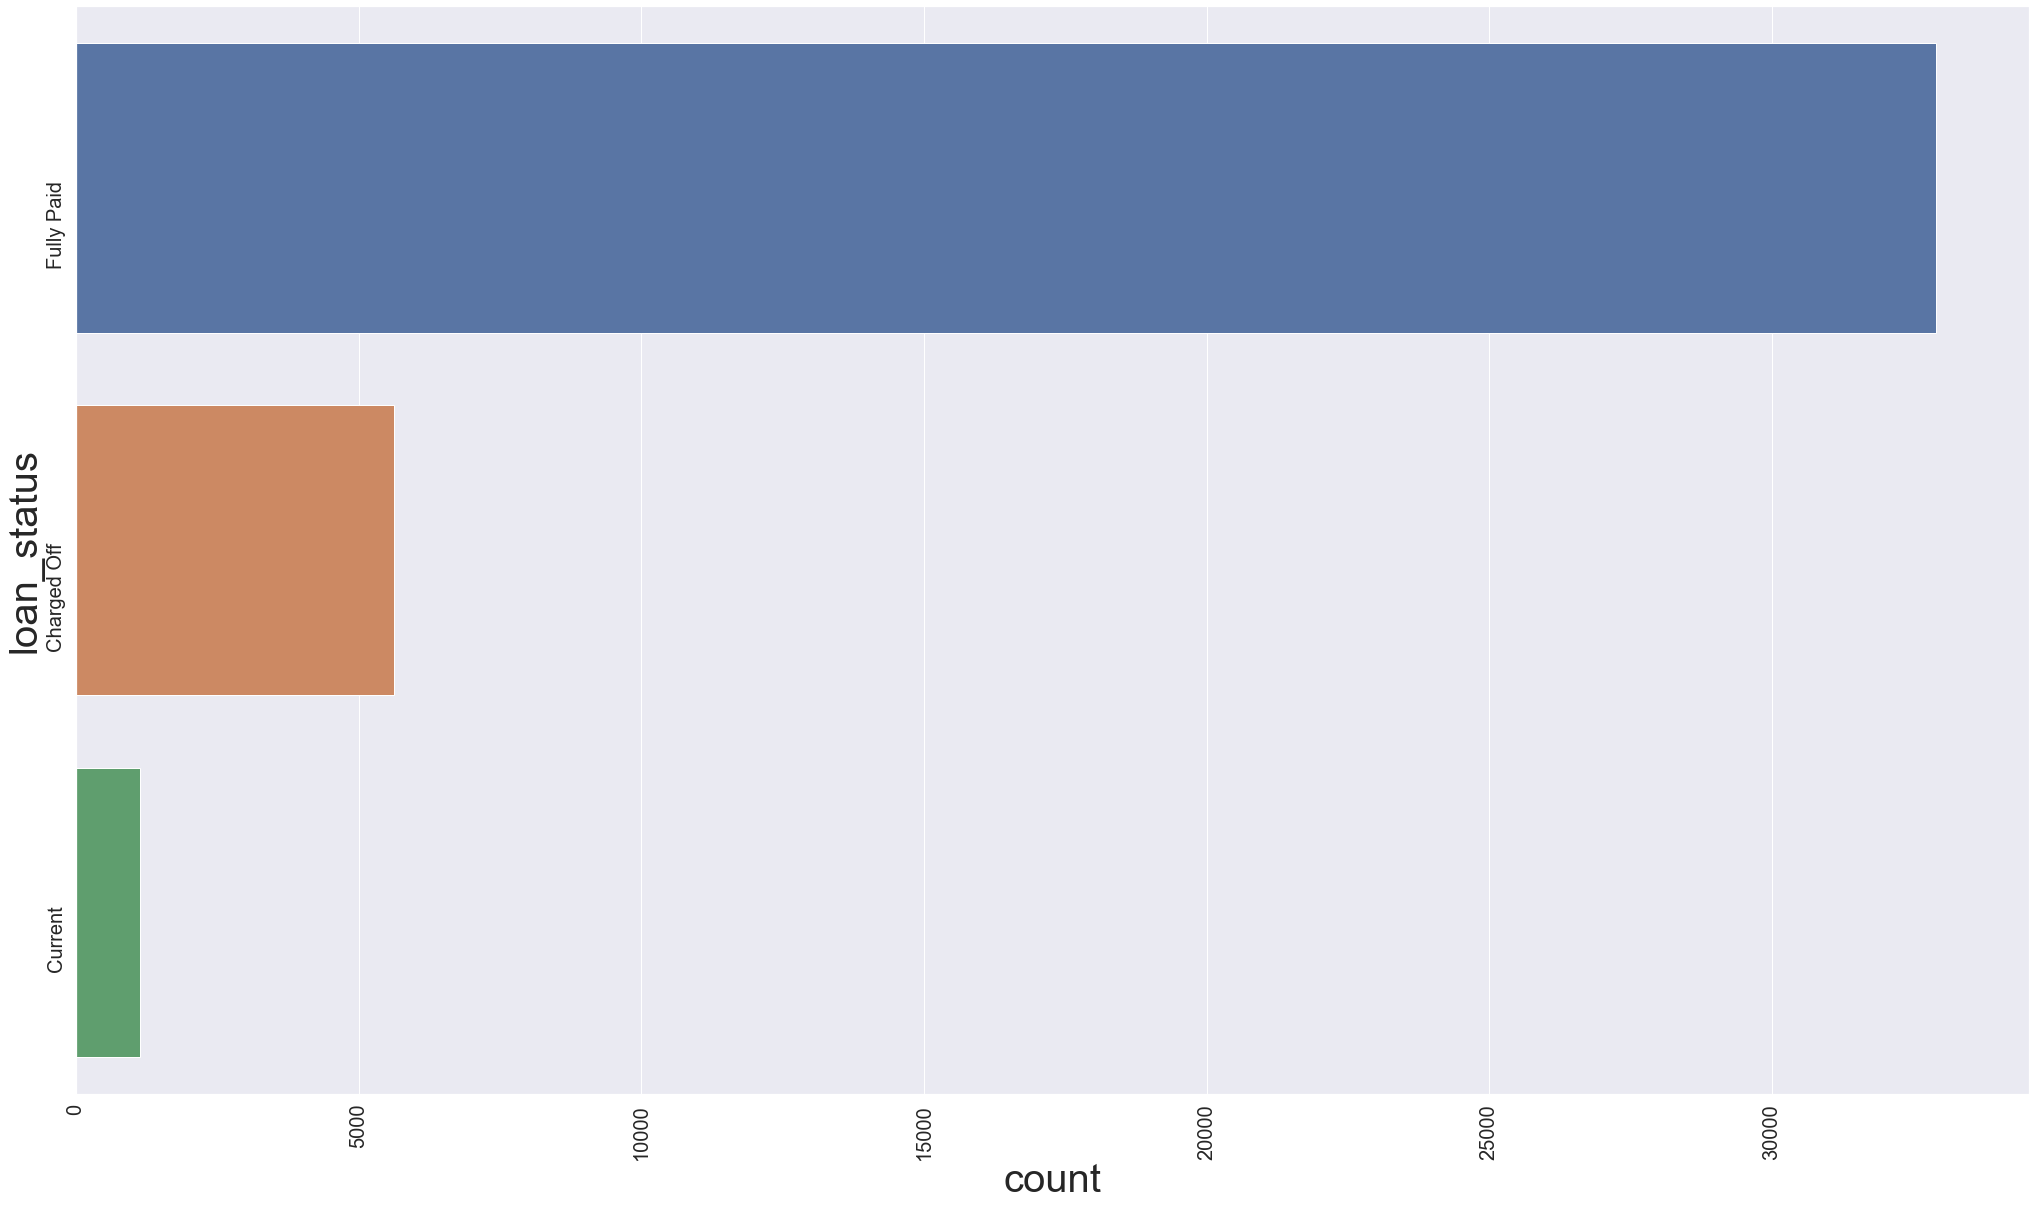

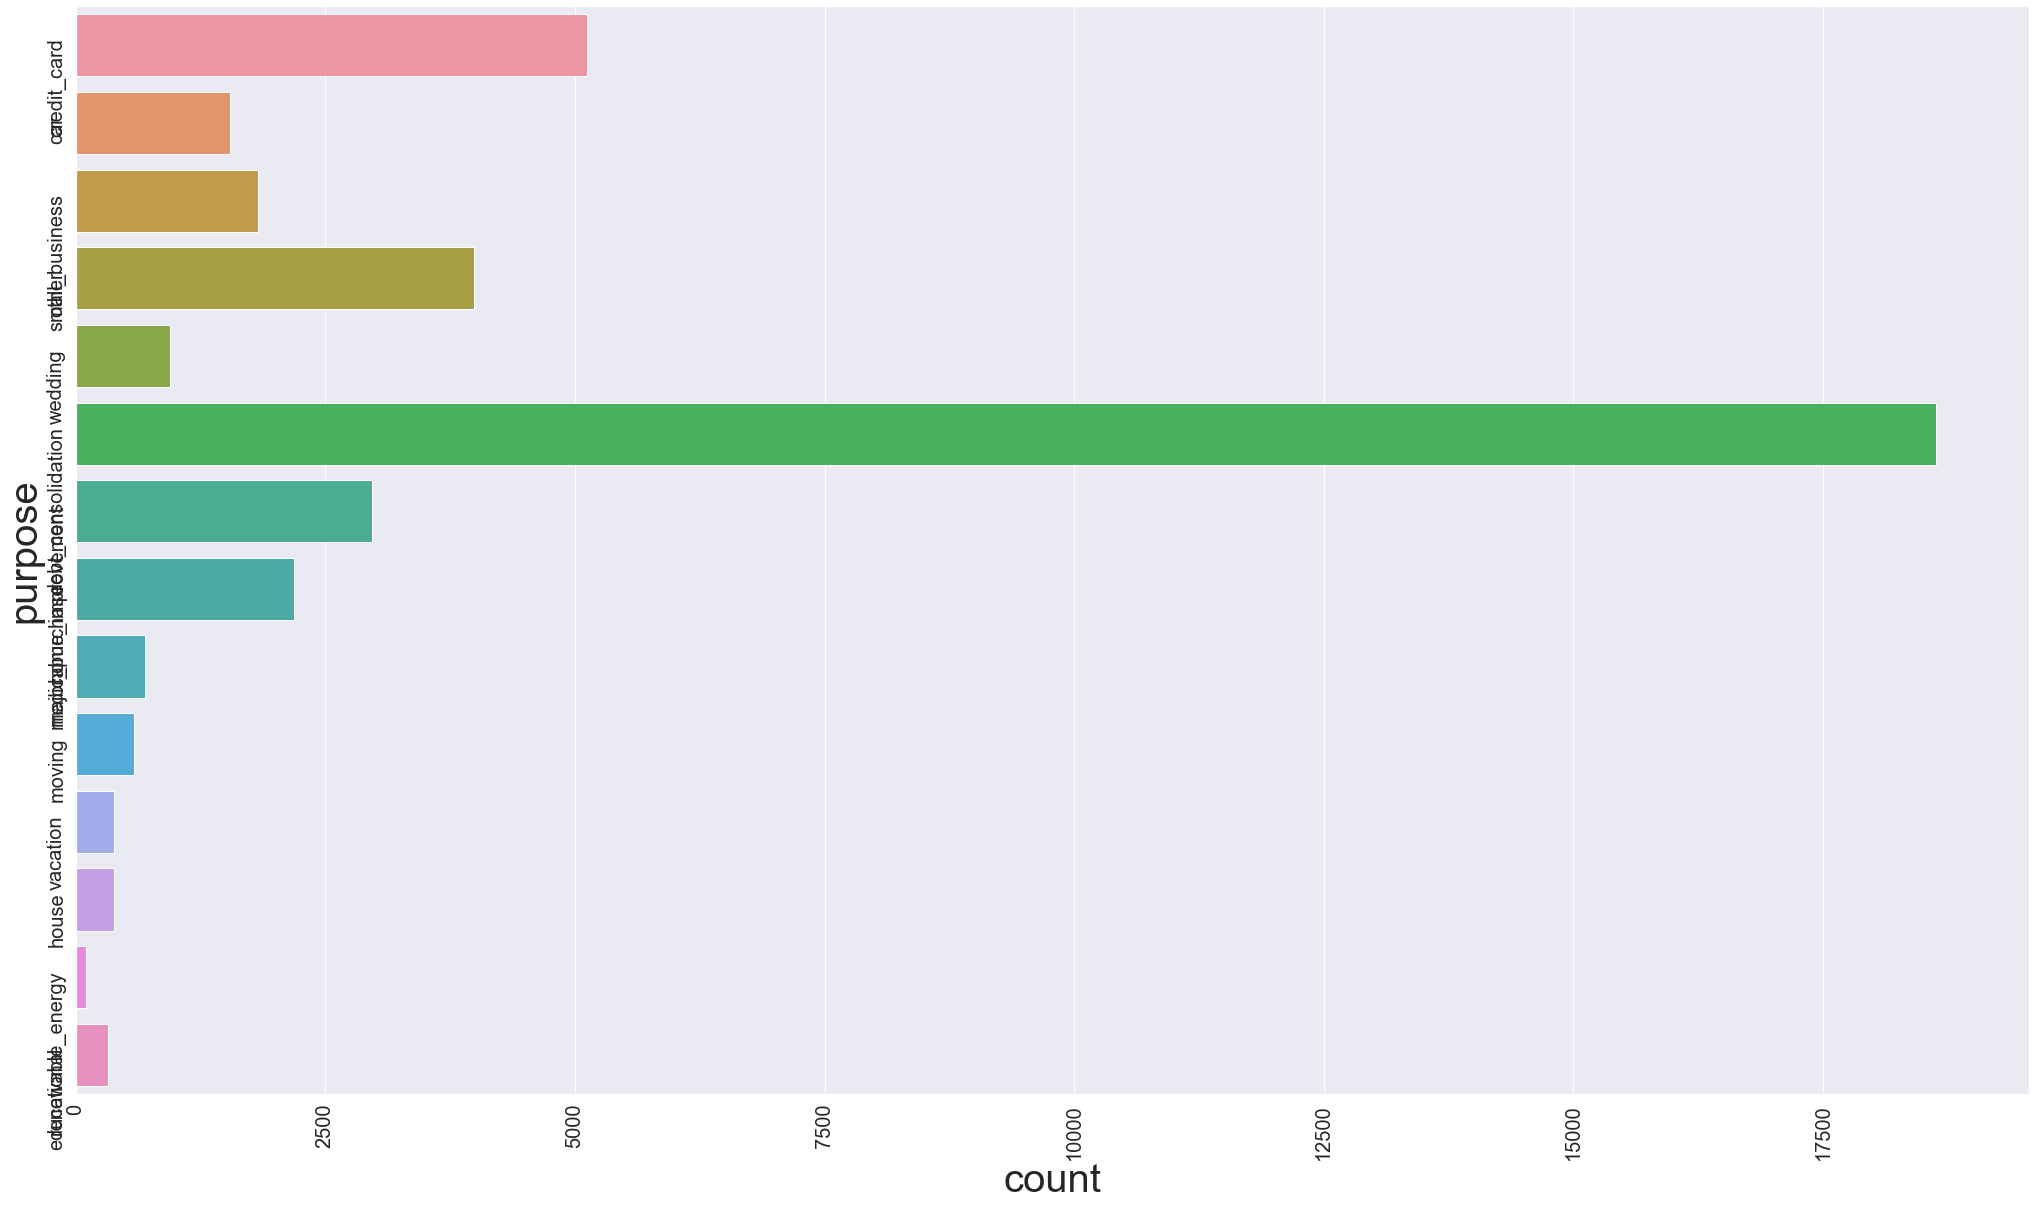

In [62]:
# Let us have the count graphs ready if we missed any absolute value analysis
for column in loan_df_new.select_dtypes(include='object'):
    if loan_df_new[column].nunique() < 50:
        fig, ax = plt.subplots(figsize=(35,20))
        plt.xticks(fontsize=20, rotation=90)
        plt.yticks(fontsize=20, rotation=90)
        plt.xlabel('count',fontsize=40)
        plt.ylabel(column,fontsize=40)
        sns.countplot(y=column, data=loan_df_new)
        plt.show()

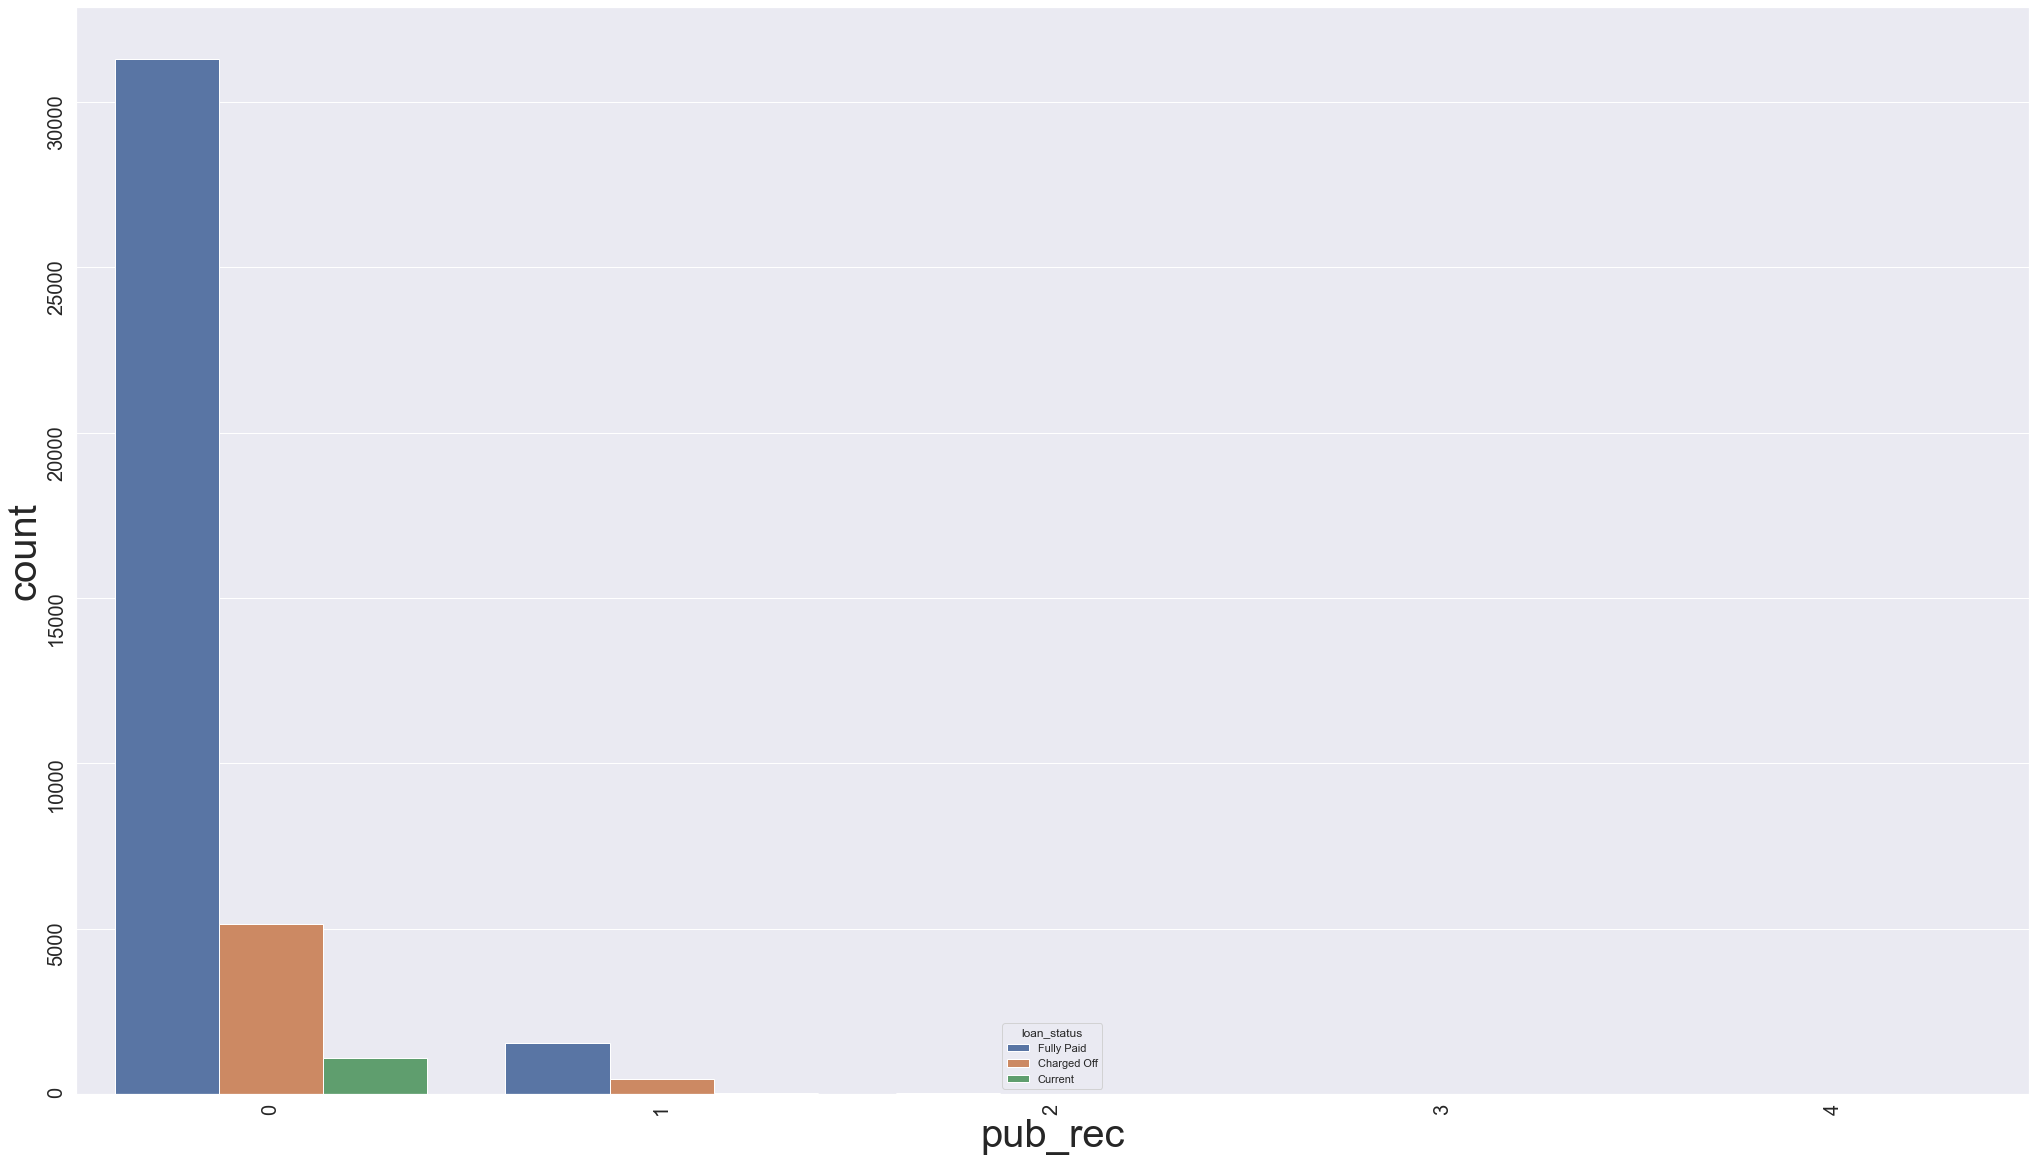

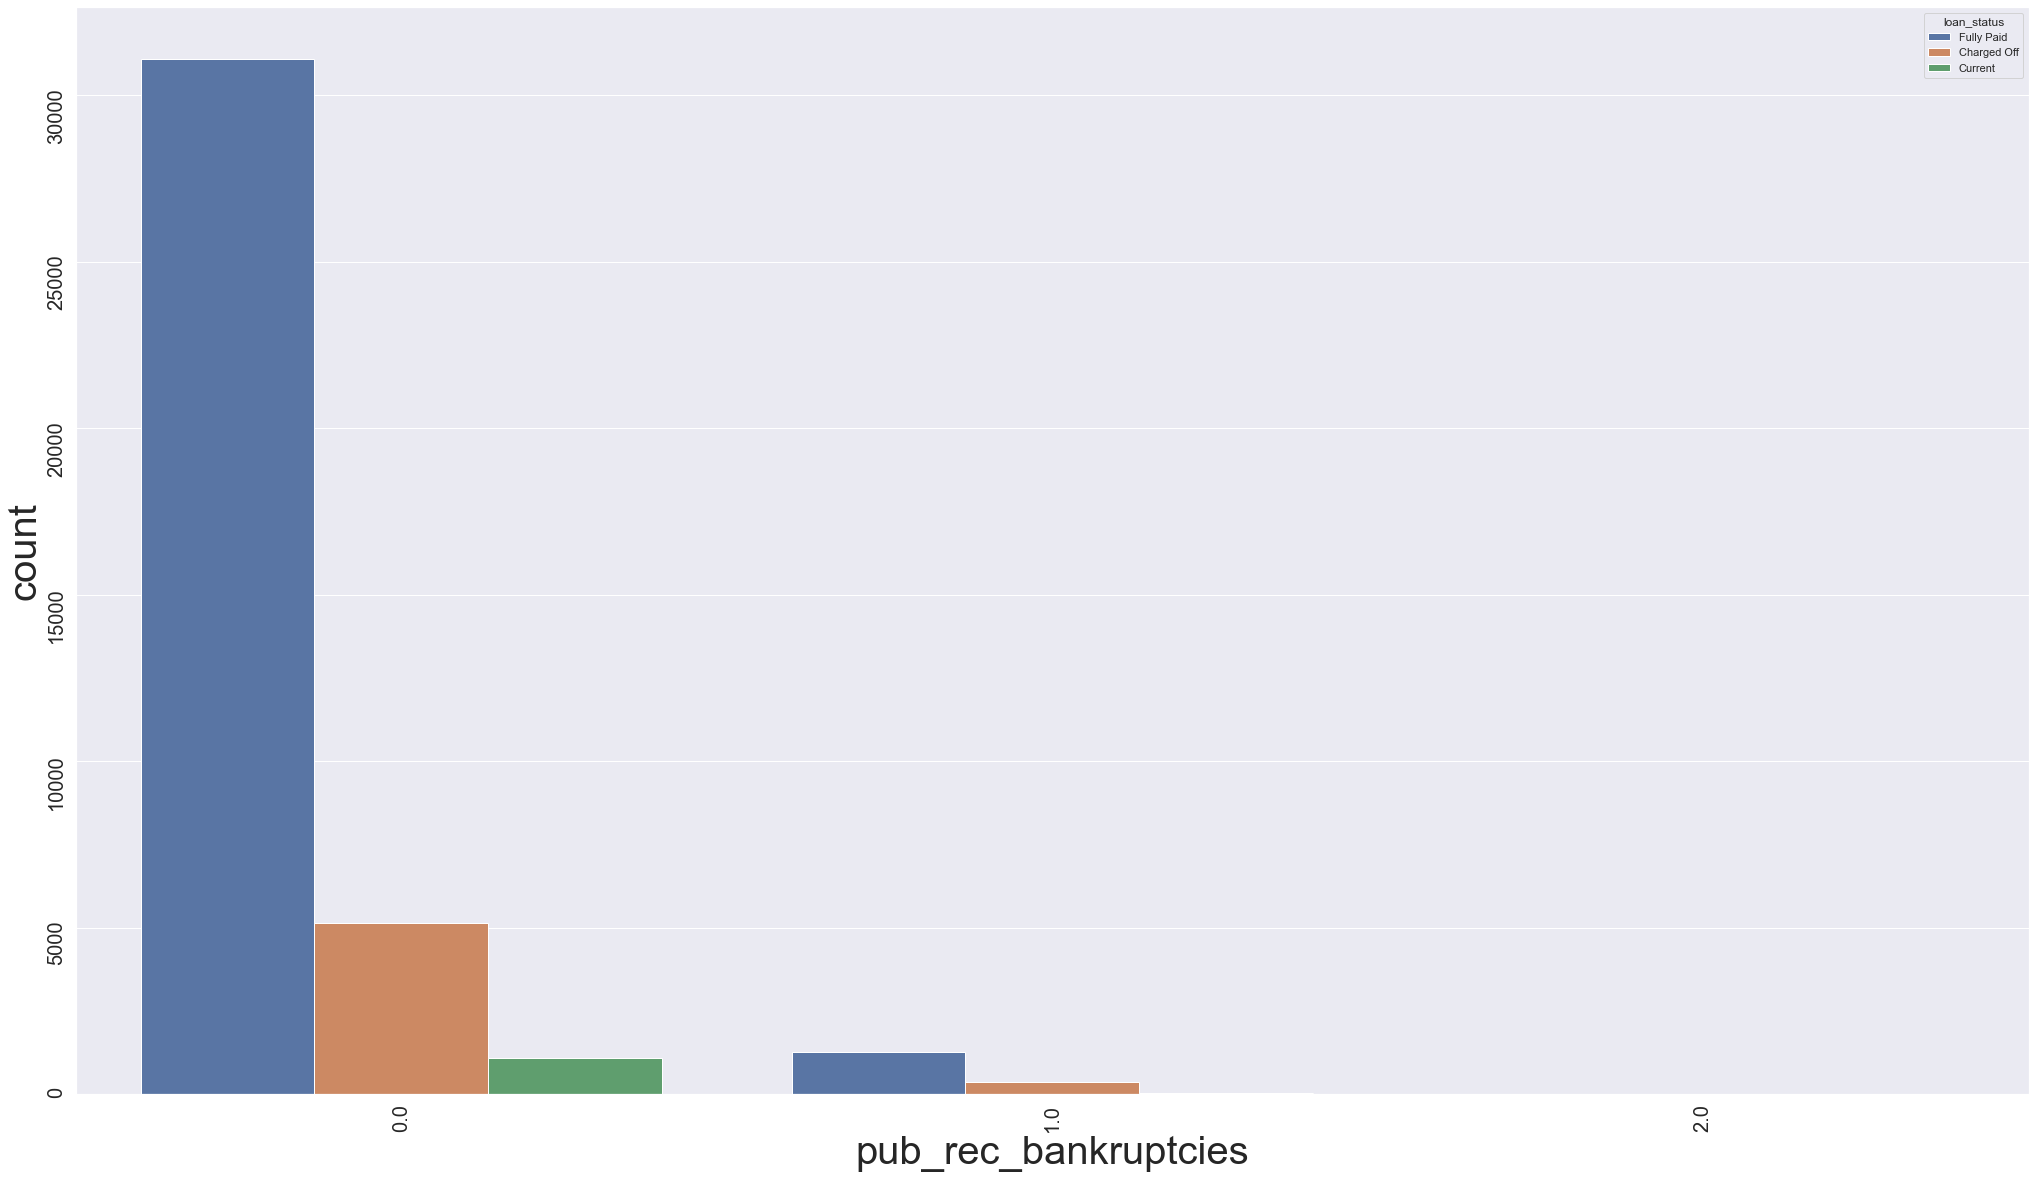

In [67]:
# Let us check these parameters again if any special relation exists in publicity
X_list = [ 'pub_rec' , 'pub_rec_bankruptcies']

count=231
for x in X_list:
   #sns.set(rc={'figure.figsize':(11.7,8.27)})
   #plt.subplot(count)
   fig, ax = plt.subplots(figsize=(35,20))
   plt.xticks(fontsize=20, rotation=90)
   plt.yticks(fontsize=20, rotation=90)
   plt.xlabel('count',fontsize=40)
   plt.ylabel(column,fontsize=40)
   sns.countplot(x=x, hue='loan_status', data=loan_df_new)
   count += 1


# Scatter Plots - bi-variate analysis aginst loan status as hue

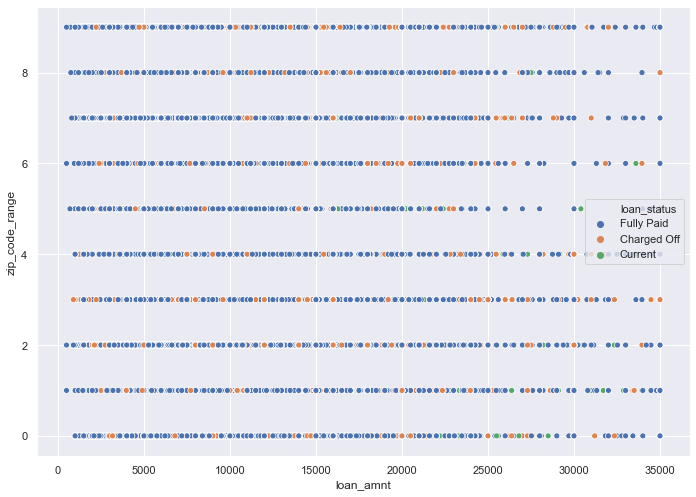

In [36]:
# loan_amt, zip_code range influence on loan_status
sns.scatterplot(x=loan_df_new["loan_amnt"],y=loan_df_new["zip_code_range"], hue=loan_df_new["loan_status"])
plt.show()

# conclusion - no particular influence of loan_amt together with zip_code_ranges.

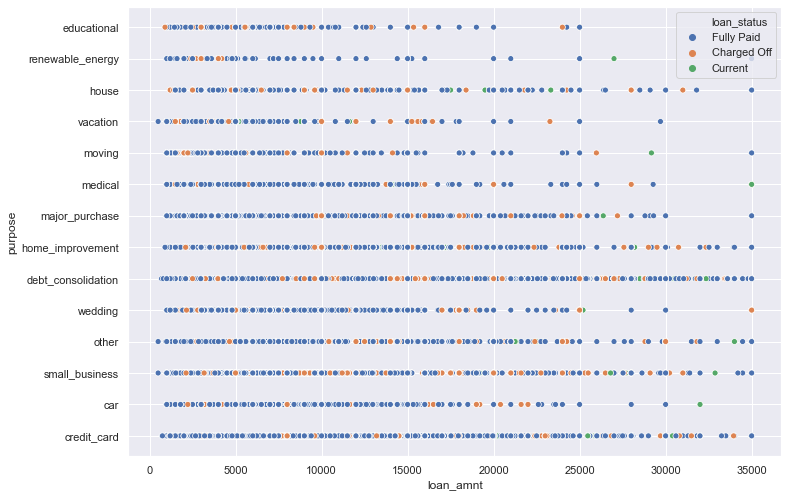

In [37]:
# loan_amt, purpose influence on loan_status
sns.scatterplot(x=loan_df_new["loan_amnt"],y=loan_df_new["purpose"], hue=loan_df_new["loan_status"])
plt.show()

# small businesses and debut consolidation were earlier concluded as having risk factor. No special relation to amt.

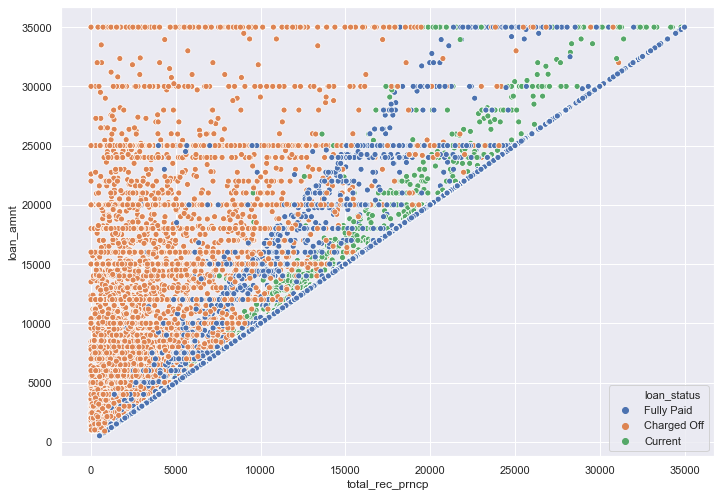

In [38]:
# loan_amt, total_principle_reocvered influence on loan_status
sns.scatterplot(x=loan_df_new["total_rec_prncp"],y=loan_df_new["loan_amnt"], hue=loan_df_new["loan_status"])
plt.show()

# Conclusion - out of approved loan_amount, around 60% of principle could be recovered
# i.e. remaining average 40% is risk that organisation carries when someone defaults
# However such risk for small loan amounts upto 15K is much higher and Bank may lose from 50-100% of approved amt.

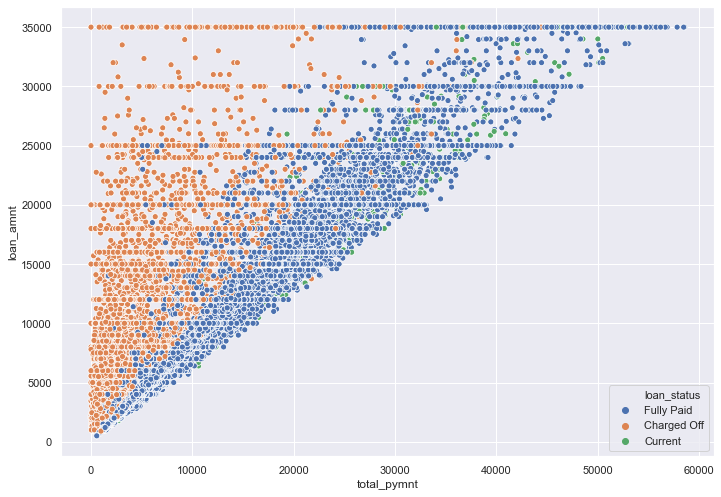

In [39]:
# loan_amt, total_payment recieved influence on loan_status , similar as above
sns.scatterplot(x=loan_df_new["total_pymnt"],y=loan_df_new["loan_amnt"], hue=loan_df_new["loan_status"])
plt.show()

# Conclusion - out of approved loan_amount, around 60% of principle could be recovered
# i.e. remaining average 40% is risk that organisation carries when someone defaults for higher loan amounts.
# However such risk for small loan amounts upto 15K is much higher and Bank may lose from 50-100% of approved amt.
# However one caveat here is if recoveries post charge off led to further collections.

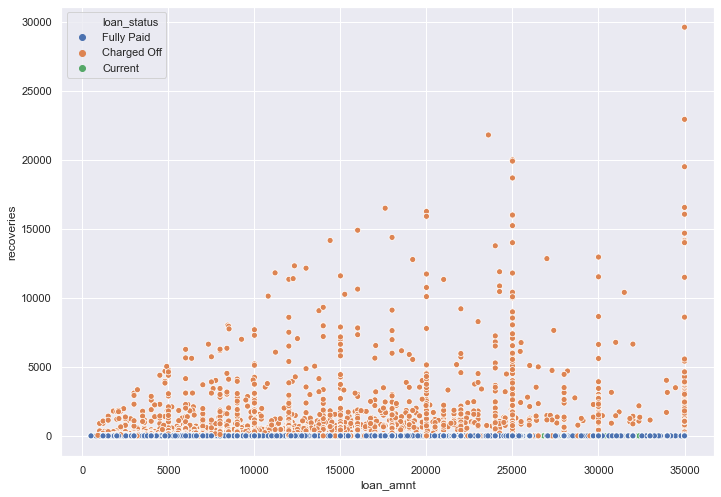

In [40]:
# loan_amt, recoveries post charge off and relation to loan_status

sns.scatterplot(x=loan_df_new["loan_amnt"],y=loan_df_new["recoveries"], hue=loan_df_new["loan_status"])
plt.show()

# conclusion - Gross recoveries are higher upto 25K loan amount and for 35K as well. recoveries increased
# linearly with loan amount upto 25K 

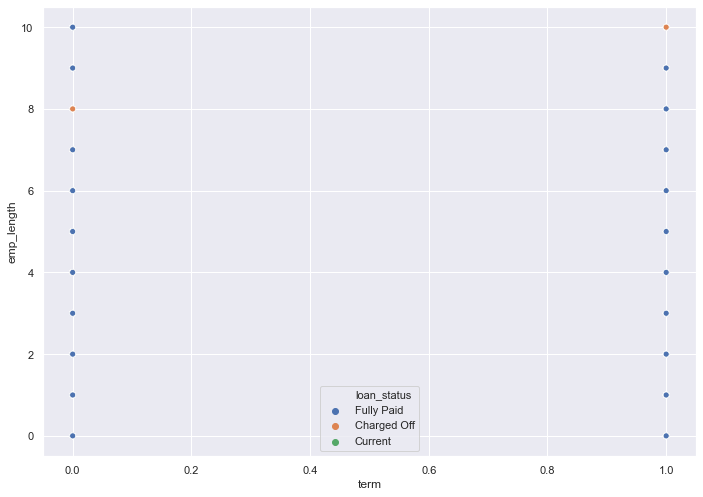

In [41]:
# employment lengh and loan term and relation to loan_status

sns.scatterplot(x=loan_df_new["term"],y=loan_df_new["emp_length"], hue=loan_df_new["loan_status"])
plt.show()

# Conclusion - no particular observation, however defaulting increases after 8 years of employment length

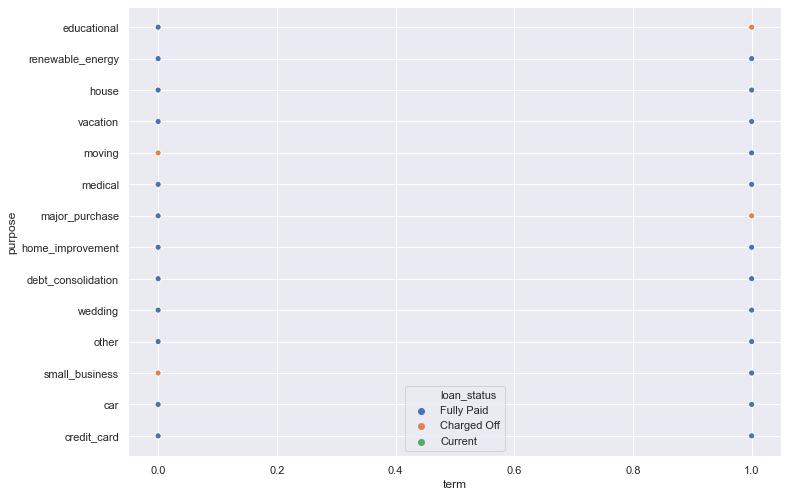

In [42]:
# employment lengh and purpose and relation to loan_status
sns.scatterplot(x=loan_df_new["term"],y=loan_df_new["purpose"], hue=loan_df_new["loan_status"])
plt.show()
# Conclusion - no particular observation, however educational and major purchasae stand out

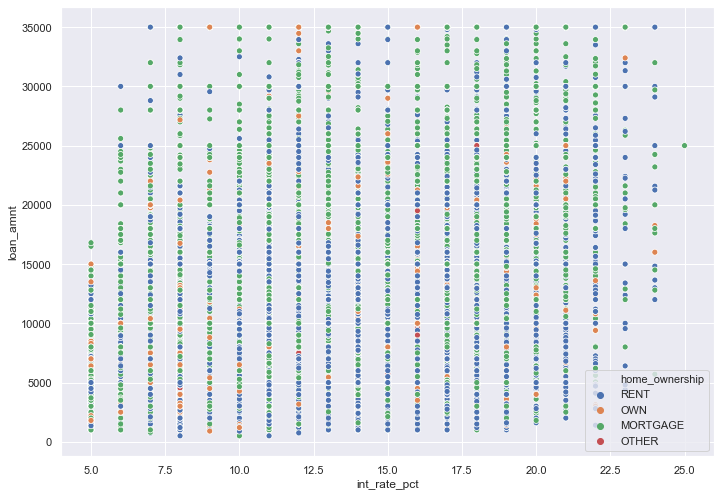

In [43]:
#  intrest rate  and loan_amount to loan_status
sns.scatterplot(x=loan_df_new["int_rate_pct"],y=loan_df_new["loan_amnt"], hue=loan_df_new["home_ownership"])
plt.show()

# Conclusion - no particular observation apart from seen earlier.

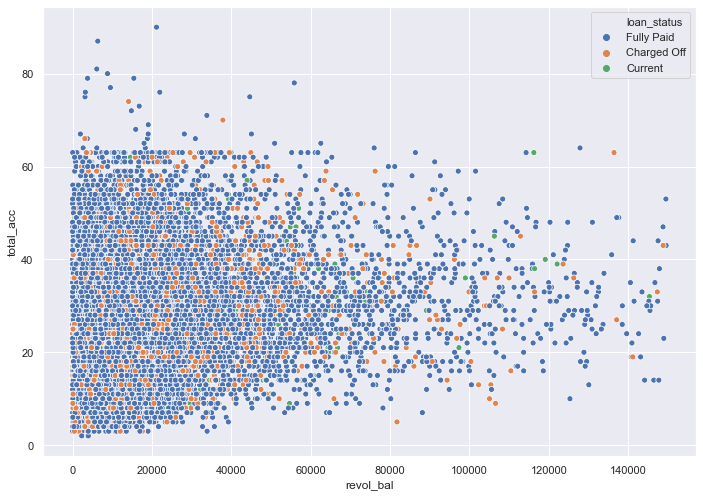

In [44]:
# recol_bal, total_acc to loan_status
sns.scatterplot(x=loan_df_new["revol_bal"],y=loan_df_new["total_acc"], hue=loan_df_new["loan_status"])
plt.show()

# Conclusion - no particular observation

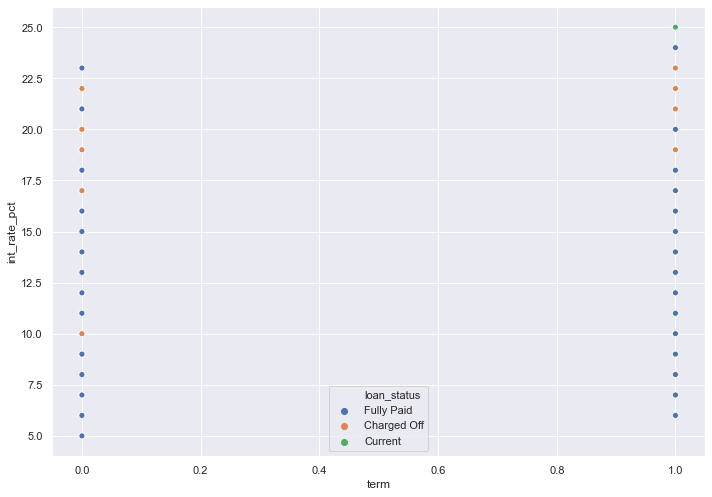

In [45]:
#  intrest rate  and loan_amount to loan_status
sns.scatterplot(x=loan_df_new["term"],y=loan_df_new["int_rate_pct"], hue=loan_df_new["loan_status"])
plt.show()

# Conclusion - higher the intrest rate, higher the defaulting rate as concluded earlier.
# it is evident for both terms


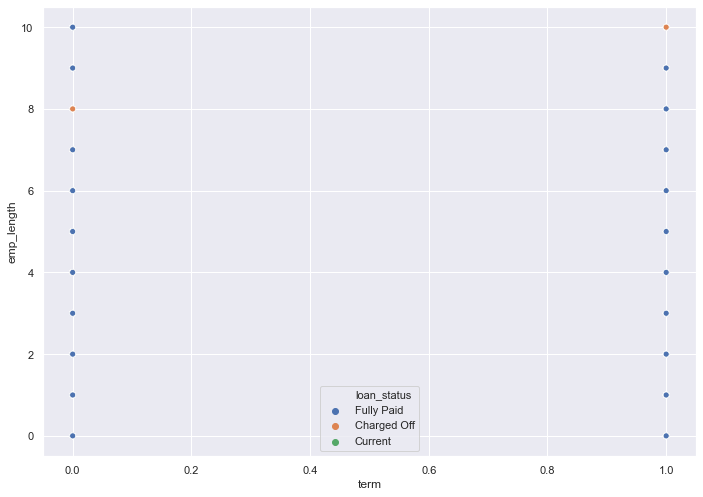

In [46]:
#  employment lenght and loan term to loan_status
sns.scatterplot(x=loan_df_new["term"],y=loan_df_new["emp_length"], hue=loan_df_new["loan_status"])
plt.show()
# Conclusion - no special conclusion

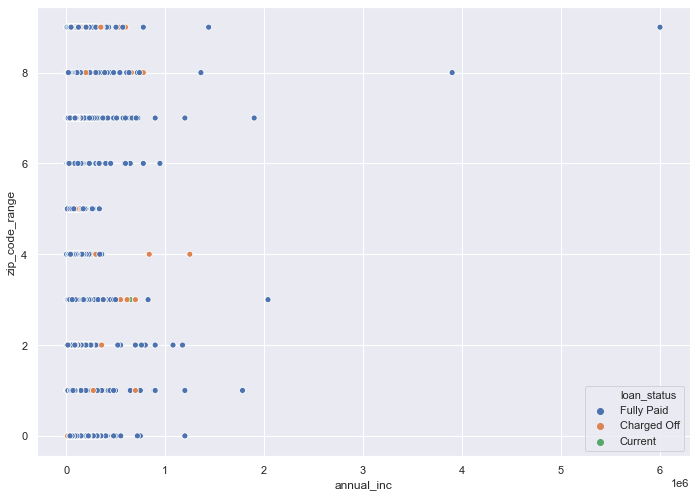

In [47]:
# annual income and zip code ranges 
sns.scatterplot(x=loan_df_new["annual_inc"],y=loan_df_new["zip_code_range"], hue=loan_df_new["loan_status"])
plt.show()

# Conclusion - no other observation